In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [2]:
nor_rawdata = pd.read_csv("14020_20231216-013313.csv", delimiter=';', skiprows=1)

In [3]:
nor_rawdata.head()

,type of registration,month,Private cars,Vans and motorhomes,Lorries
0,New vehicles,1998M01,9639,1982,483
1,New vehicles,1998M02,9687,1644,390
2,New vehicles,1998M03,12913,1930,446
3,New vehicles,1998M04,12349,1758,465
4,New vehicles,1998M05,14269,1761,436


#### Reading and Understanding the JSON Data Structure
First, I load the JSON file as a dictionary in Python. This allows me to programmatically access the contents of the JSON file.

In [4]:
import json

json_file_path = 'TEM21.20231211125201.json'
with open(json_file_path, 'r') as file:
    json_dict = json.load(file)


#### Identifying Relevant Data Keys
Inside the JSON file, I focus on the dataset key, specifically the dimension and value keys under it. dimension holds the dimensions (classifications) of the data set and their labels. value contains the numerical data.

In [5]:
dimension_keys = list(json_dict['dataset']['dimension'].keys())
values = json_dict['dataset']['value']


#### Creating Label Maps for Dimensions
For each dimension, I create mappings between their indices and labels. This is important for later associating numerical data with meaningful labels.

In [6]:
statistic_info = json_dict['dataset']['dimension']['STATISTIC']['category']
months_info = json_dict['dataset']['dimension']['TLIST(M1)']['category']
taxation_class_info = json_dict['dataset']['dimension']['C02172V02618']['category']

statistic_label_map = statistic_info['label']
month_label_map = months_info['label']
taxation_class_label_map = taxation_class_info['label']


#### Generating All Combinations of Dimensions
Using itertools.product, I generate all possible combinations of the STATISTIC, TLIST(M1), and C02172V02618 dimensions. These combinations represent the order of the numerical data in the value key.

In [7]:
import itertools
dimension_combinations = list(itertools.product(
    statistic_info['index'].keys(),
    months_info['index'].keys(),
    taxation_class_info['index'].keys()
))

#### Merging Numerical Data with Labels
For each combination of dimensions, I extract the corresponding numerical value from the value list and store it in a list along with its relevant labels. This process is repeated for all combinations and values.

In [8]:
unpacked_values = []
for combo in dimension_combinations:
    statistic, month, taxation_class = combo
    value = values.pop(0)  
    unpacked_values.append([
        statistic, statistic_label_map[statistic], 
        month, month_label_map[month], 
        taxation_class, taxation_class_label_map.get(taxation_class, '-'), 
        value
    ])

#### Creating the DataFrame
I convert the data I've gathered into a pandas DataFrame. This DataFrame contains a row for each combination of dimensions along with the associated numerical value.

In [9]:
ir_rawdata = pd.DataFrame(unpacked_values, columns=[
    'STATISTIC', 'Statistic Label', 'TList(M1)', 'Month', 
    'C02172V02618', 'Taxation Class', 'VALUE'
])
ir_rawdata.head(50)

,STATISTIC,Statistic Label,TList(M1),Month,C02172V02618,Taxation Class,VALUE
0,TEM21C01,Vehicles Licensed for the First Time,199801,1998M01,-,All Vehicles,24484.0
1,TEM21C01,Vehicles Licensed for the First Time,199801,1998M01,01,New Vehicles,20608.0
2,TEM21C01,Vehicles Licensed for the First Time,199801,1998M01,011,New Private Cars,17192.0
3,TEM21C01,Vehicles Licensed for the First Time,199801,1998M01,012,New Goods Vehicles,2518.0
4,TEM21C01,Vehicles Licensed for the First Time,199801,1998M01,013,New Tractors,219.0
5,TEM21C01,Vehicles Licensed for the First Time,199801,1998M01,014,New Motor Cycles,268.0
6,TEM21C01,Vehicles Licensed for the First Time,199801,1998M01,015,New Exempt Vehicles,218.0
7,TEM21C01,Vehicles Licensed for the First Time,199801,1998M01,016,"New public service vehicles, heavy agricultura...",193.0
8,TEM21C01,Vehicles Licensed for the First Time,199801,1998M01,02,Secondhand Vehicles,3876.0
9,TEM21C01,Vehicles Licensed for the First Time,199801,1998M01,021,Secondhand Private Cars,2969.0


In [10]:
missing_values = ir_rawdata.isnull().sum()
print(missing_values)

STATISTIC           0
Statistic Label     0
TList(M1)           0
Month               0
C02172V02618        0
Taxation Class      0
VALUE              42
dtype: int64


In [11]:
dfir = ir_rawdata[ir_rawdata["Statistic Label"]=="Vehicles Licensed for the First Time"]
dfir = dfir[(dfir['Taxation Class'] == 'New Private Cars') | (dfir['Taxation Class'] == 'New Goods Vehicles')]

dfir.head()

,STATISTIC,Statistic Label,TList(M1),Month,C02172V02618,Taxation Class,VALUE
2,TEM21C01,Vehicles Licensed for the First Time,199801,1998M01,011,New Private Cars,17192.0
3,TEM21C01,Vehicles Licensed for the First Time,199801,1998M01,012,New Goods Vehicles,2518.0
16,TEM21C01,Vehicles Licensed for the First Time,199802,1998M02,011,New Private Cars,15480.0
17,TEM21C01,Vehicles Licensed for the First Time,199802,1998M02,012,New Goods Vehicles,2377.0
30,TEM21C01,Vehicles Licensed for the First Time,199803,1998M03,011,New Private Cars,14703.0


In [12]:
missing_values = dfir.isnull().sum()
print(missing_values)


STATISTIC          0
Statistic Label    0
TList(M1)          0
Month              0
C02172V02618       0
Taxation Class     0
VALUE              0
dtype: int64


In [13]:
dfir.describe(include="all")

,STATISTIC,Statistic Label,TList(M1),Month,C02172V02618,Taxation Class,VALUE
count,622,622,622,622,622,622,622.000000
unique,1,1,311,311,2,2,NaN
top,TEM21C01,Vehicles Licensed for the First Time,199801,1998M01,011,New Private Cars,NaN
freq,622,622,2,2,311,311,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,6373.704180
std,NaN,NaN,NaN,NaN,NaN,NaN,6730.183572
min,NaN,NaN,NaN,NaN,NaN,NaN,238.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,1813.250000
50%,NaN,NaN,NaN,NaN,NaN,NaN,3074.500000
75%,NaN,NaN,NaN,NaN,NaN,NaN,9361.250000


Simdi tum veri setinde ayni olan ve karsilastirma icin gereksiz bilgi iceren sutunlari kaldiracagim.

In [14]:
del dfir["STATISTIC"]
del dfir["Statistic Label"]
del dfir["TList(M1)"]
del dfir["C02172V02618"]

dfir.head()

,Month,Taxation Class,VALUE
2,1998M01,New Private Cars,17192.0
3,1998M01,New Goods Vehicles,2518.0
16,1998M02,New Private Cars,15480.0
17,1998M02,New Goods Vehicles,2377.0
30,1998M03,New Private Cars,14703.0


In [15]:
dfir = dfir.pivot_table(index='Month', columns='Taxation Class', values='VALUE')

dfir.reset_index(inplace=True)


In [16]:
dfir["Total New Vehicles"]= dfir["New Goods Vehicles"] + dfir["New Private Cars"]
dfir.head()

Taxation Class,Month,New Goods Vehicles,New Private Cars,Total New Vehicles
0,1998M01,2518.0,17192.0,19710.0
1,1998M02,2377.0,15480.0,17857.0
2,1998M03,2366.0,14703.0,17069.0
3,1998M04,2507.0,16903.0,19410.0
4,1998M05,2172.0,15921.0,18093.0


Irlanda'nin çiğ veri setini son haline dönüştürme sürecinde, amacım İrlanda'nın araç lisanslama verilerini, Norveç'in veri seti ile objektif bir karsilastirma icin uygun formata getirmekti. Bu süreçte, iki veri setinin yapısını ve içeriğini dikkatle inceledim. Norveç'in veri seti, daha sınırlı sütunlara ve daha odaklı verilere sahipti, bu yüzden İrlanda'nın daha kapsamlı olan raw veri setini, Norveç veri setine uyum sağlayacak şekilde yeniden yapılandırdım.

Bu yeniden yapılandırma sürecinde, ilk olarak, "ir_rawdata" içerisindeki gereksiz veya karşılaştırma için uygun olmayan sütunları ve satırları çıkardım. Ardından, her iki veri setinde de ortak olan anahtar sütunları belirleyerek, bu sütunları odak noktası olarak seçtim. Bu sütunlar, yeni özel araçlar, yeni ticari araçlar ve toplam yeni araç sayılarıydı. Bu seçim, karşılaştırmalı analizlerde tutarlılık sağlamak ve iki ülkenin araç lisanslama trendlerini daha net bir şekilde anlamak için yapıldı.

Son olarak, veri tiplerini ve formatlarını standardize ettim, böylece iki veri seti arasında doğrudan ve objektif karşılaştırmalar yapabilmek için gerekli düzgün ve uyumlu bir yapı elde ettim. Bu süreç, her iki ülkenin araç lisanslama verilerindeki benzerlikleri ve farklılıkları daha net bir şekilde gözlemlememi ve analiz etmemi sağladı.

In [17]:
dfir['New Goods Vehicles'], dfir['New Private Cars'] = dfir['New Private Cars'], dfir['New Goods Vehicles']
dfir.head()

Taxation Class,Month,New Goods Vehicles,New Private Cars,Total New Vehicles
0,1998M01,17192.0,2518.0,19710.0
1,1998M02,15480.0,2377.0,17857.0
2,1998M03,14703.0,2366.0,17069.0
3,1998M04,16903.0,2507.0,19410.0
4,1998M05,15921.0,2172.0,18093.0


In [18]:
dfir = dfir.rename(columns={'New Goods Vehicles': 'New Private Cars', 'New Private Cars': 'New Goods Vehicles'})
dfir.head()

Taxation Class,Month,New Private Cars,New Goods Vehicles,Total New Vehicles
0,1998M01,17192.0,2518.0,19710.0
1,1998M02,15480.0,2377.0,17857.0
2,1998M03,14703.0,2366.0,17069.0
3,1998M04,16903.0,2507.0,19410.0
4,1998M05,15921.0,2172.0,18093.0


In [19]:
print(nor_rawdata.columns)

Index(['type of registration', 'month', 'Private cars', 'Vans and motorhomes',
       'Lorries'],
      dtype='object')


In [20]:
nor_rawdata["New Private Cars"]=nor_rawdata["Private cars"]
nor_rawdata["New Goods Vehicles"]=nor_rawdata["Vans and motorhomes"] + nor_rawdata["Lorries"]
nor_rawdata["Total New Vehicles"]= nor_rawdata["New Private Cars"] + nor_rawdata["New Goods Vehicles"]
nor_rawdata.head()

,type of registration,month,Private cars,Vans and motorhomes,Lorries,New Private Cars,New Goods Vehicles,Total New Vehicles
0,New vehicles,1998M01,9639,1982,483,9639,2465,12104
1,New vehicles,1998M02,9687,1644,390,9687,2034,11721
2,New vehicles,1998M03,12913,1930,446,12913,2376,15289
3,New vehicles,1998M04,12349,1758,465,12349,2223,14572
4,New vehicles,1998M05,14269,1761,436,14269,2197,16466


In [21]:
dfnor=nor_rawdata.copy()
dfnor.head()

,type of registration,month,Private cars,Vans and motorhomes,Lorries,New Private Cars,New Goods Vehicles,Total New Vehicles
0,New vehicles,1998M01,9639,1982,483,9639,2465,12104
1,New vehicles,1998M02,9687,1644,390,9687,2034,11721
2,New vehicles,1998M03,12913,1930,446,12913,2376,15289
3,New vehicles,1998M04,12349,1758,465,12349,2223,14572
4,New vehicles,1998M05,14269,1761,436,14269,2197,16466


In [22]:
del dfnor["type of registration"]
del dfnor["Private cars"]
del dfnor["Vans and motorhomes"]
del dfnor["Lorries"]
dfnor.head()

,month,New Private Cars,New Goods Vehicles,Total New Vehicles
0,1998M01,9639,2465,12104
1,1998M02,9687,2034,11721
2,1998M03,12913,2376,15289
3,1998M04,12349,2223,14572
4,1998M05,14269,2197,16466


In [23]:
dfnor = dfnor.rename(columns={'month': 'Month'}, inplace=False)

In [24]:
dfnor.shape

(311, 4)

In [25]:
dfir.shape

(311, 4)

## Descriptive Statistics and EDA

In [27]:
ireland_descriptive_stats = dfir.describe()

norway_descriptive_stats = dfnor.describe()

comparison_descriptive = pd.concat([ireland_descriptive_stats, norway_descriptive_stats], axis=1, keys=['Ireland', 'Norway'])
comparison_descriptive

Ireland                                        \
Taxation Class New Private Cars New Goods Vehicles Total New Vehicles   
count                311.000000         311.000000          311.00000   
mean               10610.672026        2136.736334        12747.40836   
std                 7317.589305        1081.725915         8188.89168   
min                  474.000000         238.000000          725.00000   
25%                 4166.000000        1196.000000         5805.50000   
50%                 9362.000000        2115.000000        11181.00000   
75%                15830.500000        2798.000000        18647.50000   
max                32961.000000        6361.000000        37227.00000   

                         Norway                                        
Taxation Class New Private Cars New Goods Vehicles Total New Vehicles  
count                311.000000         311.000000         311.000000  
mean               11289.421222        2821.758842       14111.180064  
std                 2854.047899         740.739280        3323.465242  
min                 1861.000000        1399.000000        3260.000000  
25%                 9667.000000        2218.500000       12096.000000  
50%                11014.000000        2796.000000       13868.000000  
75%                12449.500000        3270.000000       15645.000000  
max                39499.000000        5795.000000       43804.000000

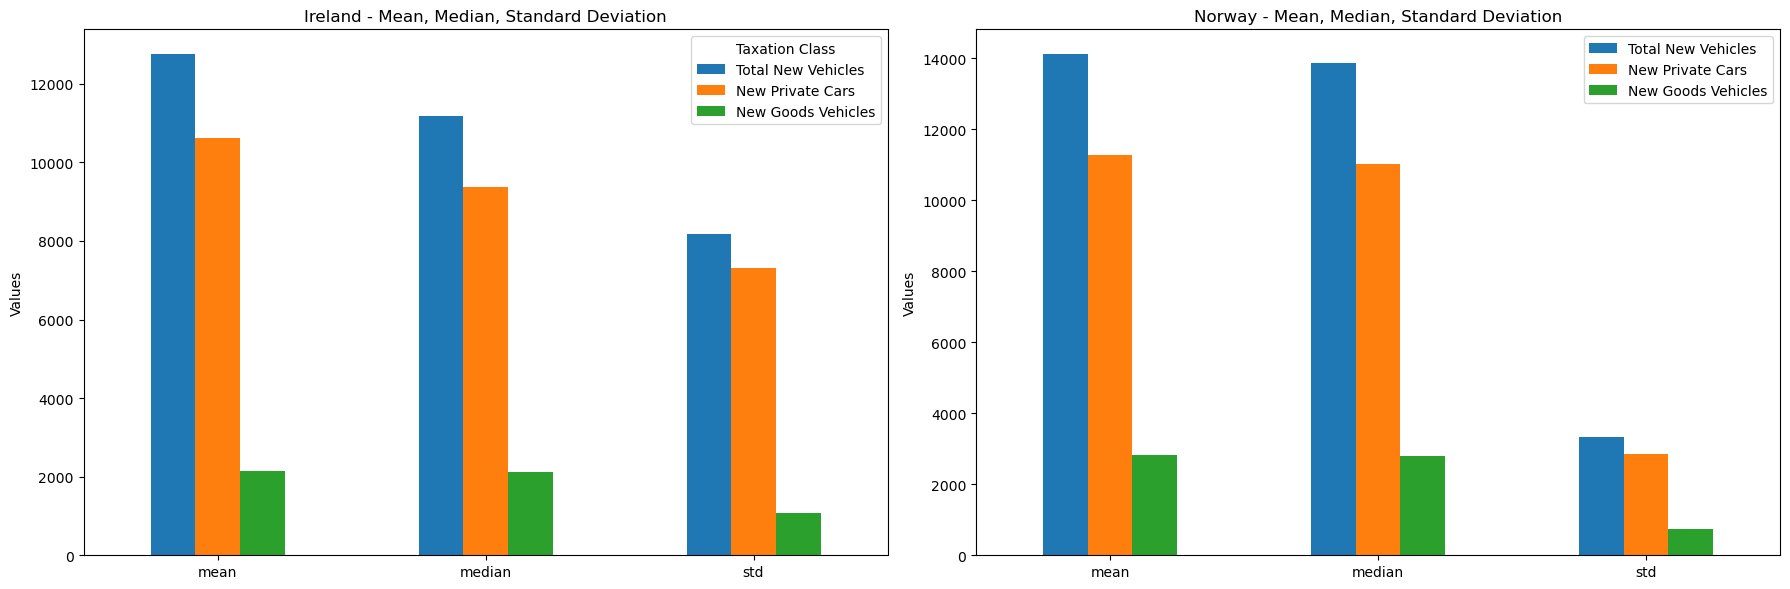

In [28]:
stats_ir = dfir[['Total New Vehicles', 'New Private Cars', 'New Goods Vehicles']].agg(['mean', 'median', 'std'])

stats_nor = dfnor[['Total New Vehicles', 'New Private Cars', 'New Goods Vehicles']].agg(['mean', 'median', 'std'])

plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
stats_ir.plot(kind='bar', ax=plt.gca())
plt.title('Ireland - Mean, Median, Standard Deviation')
plt.ylabel('Values')
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
stats_nor.plot(kind='bar', ax=plt.gca())
plt.title('Norway - Mean, Median, Standard Deviation')
plt.ylabel('Values')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

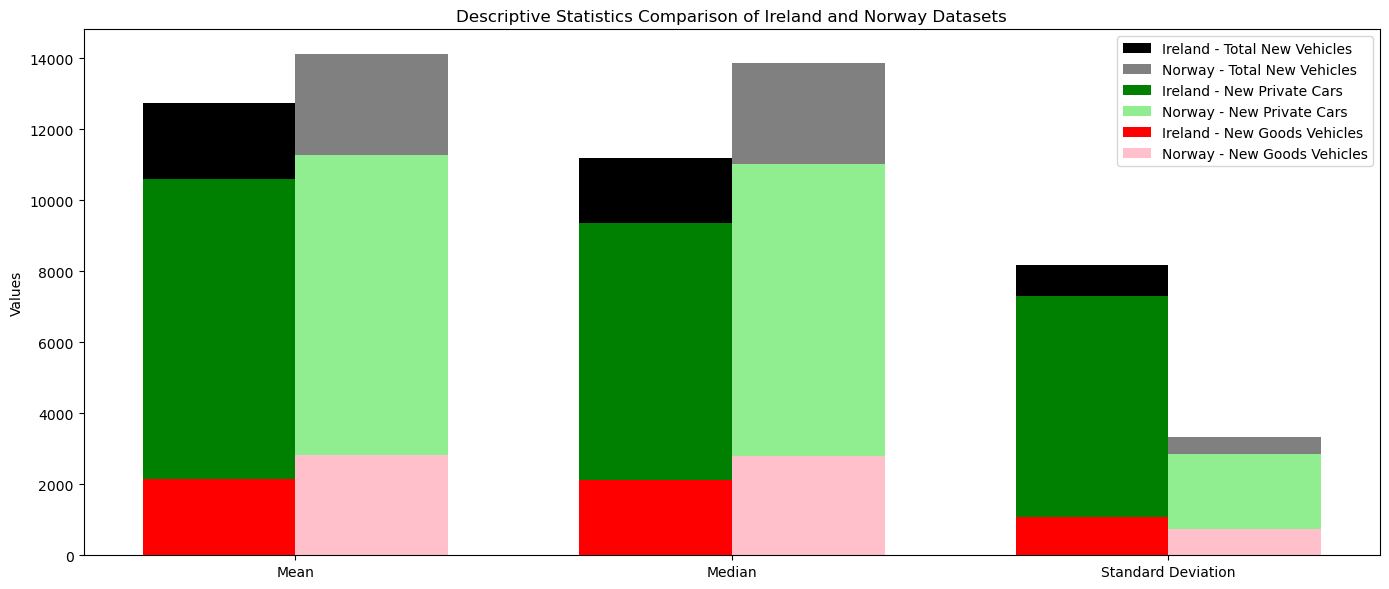

In [29]:
stats_ir = dfir[['Total New Vehicles', 'New Private Cars', 'New Goods Vehicles']].agg(['mean', 'median', 'std'])
stats_nor = dfnor[['Total New Vehicles', 'New Private Cars', 'New Goods Vehicles']].agg(['mean', 'median', 'std'])

colors_ir = ['black', 'green', 'red']
colors_nor = ['gray', 'lightgreen', 'pink']

bar_width = 0.35
index = np.arange(len(stats_ir))

plt.figure(figsize=(14, 6))

for i, col in enumerate(stats_ir.columns):
    plt.bar(index - bar_width/2, stats_ir[col], bar_width, label=f'Ireland - {col}', color=colors_ir[i])
    plt.bar(index + bar_width/2, stats_nor[col], bar_width, label=f'Norway - {col}', color=colors_nor[i])

plt.title('Descriptive Statistics Comparison of Ireland and Norway Datasets')
plt.xticks(index, ['Mean', 'Median', 'Standard Deviation'])
plt.ylabel('Values')
plt.legend()

plt.tight_layout()
plt.show()

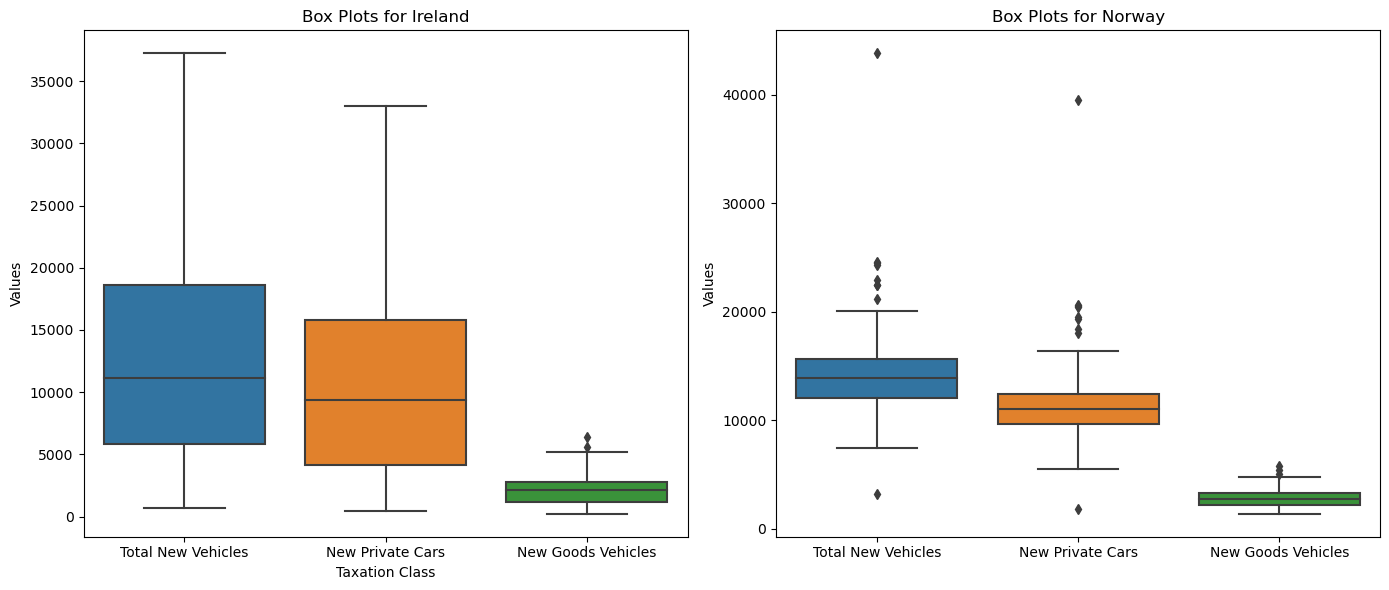

In [30]:
import seaborn as sns
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(data=dfir[['Total New Vehicles', 'New Private Cars', 'New Goods Vehicles']])
plt.title('Box Plots for Ireland')
plt.ylabel('Values')

plt.subplot(1, 2, 2)
sns.boxplot(data=dfnor[['Total New Vehicles', 'New Private Cars', 'New Goods Vehicles']])
plt.title('Box Plots for Norway')
plt.ylabel('Values')

plt.tight_layout()
plt.show()

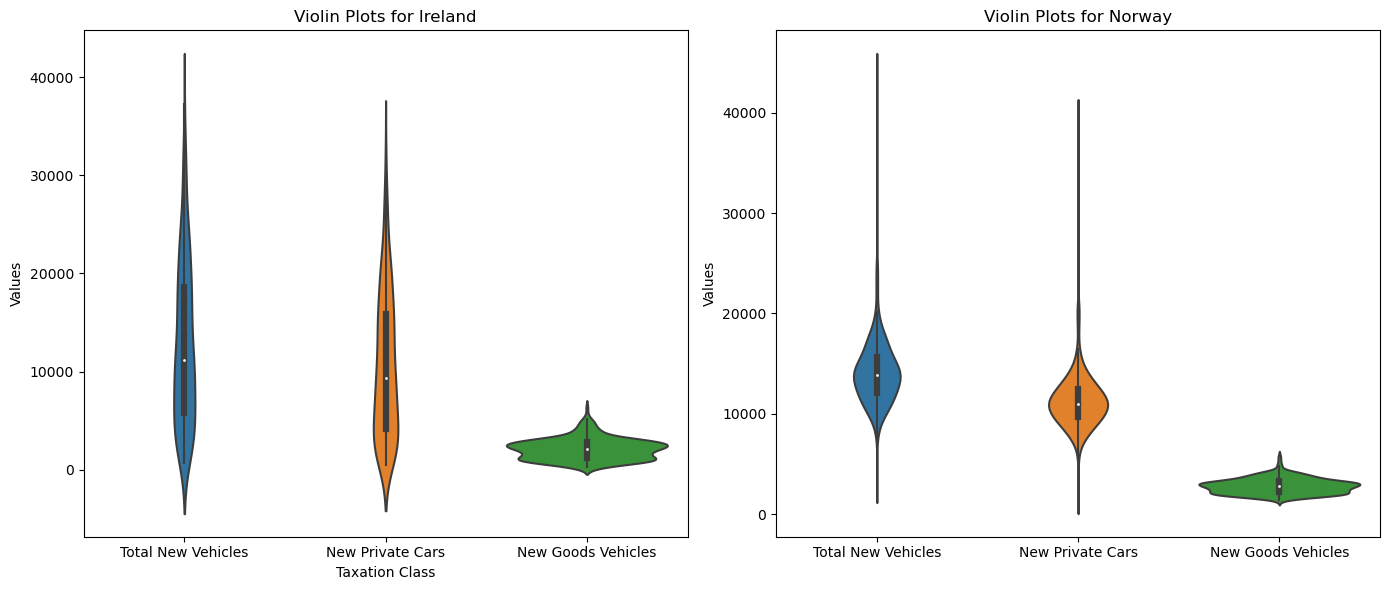

In [31]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.violinplot(data=dfir[['Total New Vehicles', 'New Private Cars', 'New Goods Vehicles']])
plt.title('Violin Plots for Ireland')
plt.ylabel('Values')

plt.subplot(1, 2, 2)
sns.violinplot(data=dfnor[['Total New Vehicles', 'New Private Cars', 'New Goods Vehicles']])
plt.title('Violin Plots for Norway')
plt.ylabel('Values')

plt.tight_layout()
plt.show()

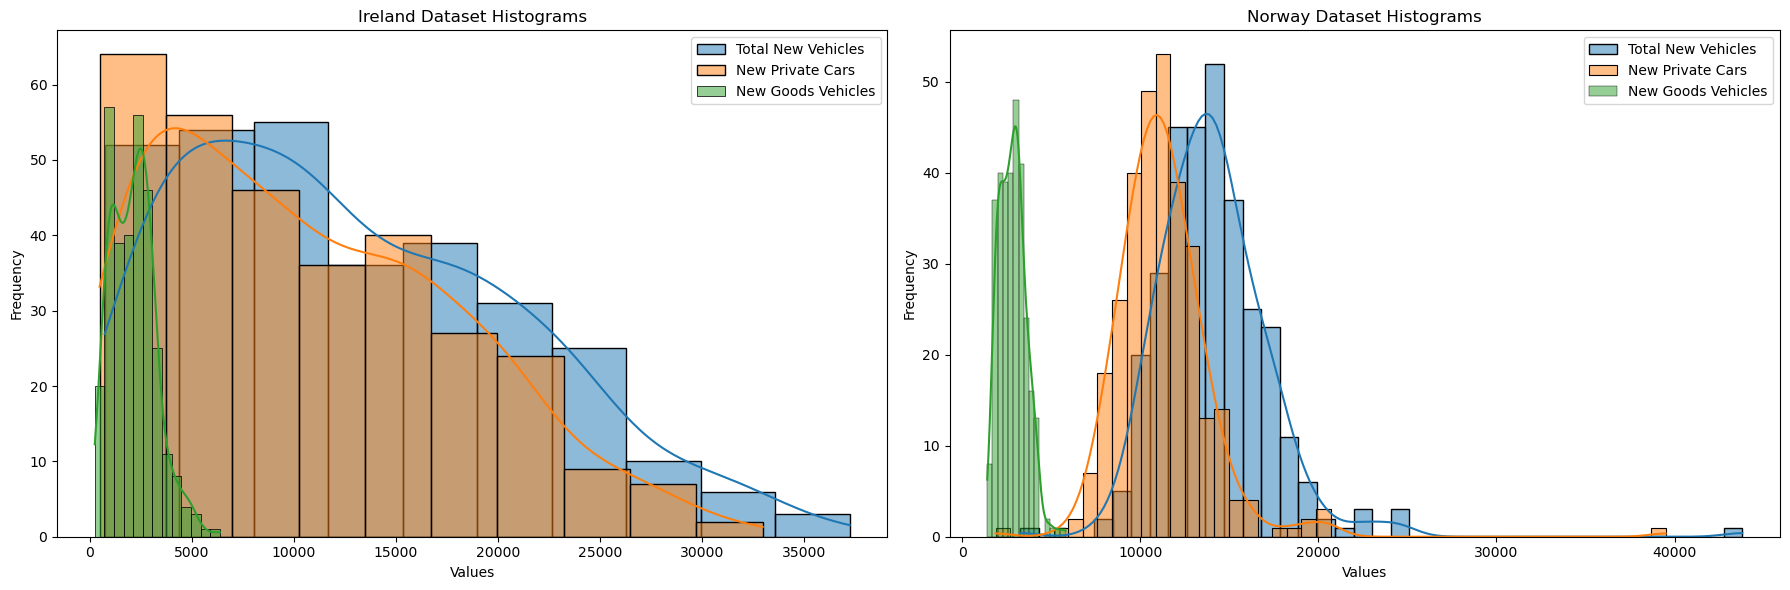

In [32]:
selected_columns = ['Total New Vehicles', 'New Private Cars', 'New Goods Vehicles']

plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
for col in selected_columns:
    sns.histplot(dfir[col], kde=True, label=col)
plt.title('Ireland Dataset Histograms')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 2, 2)
for col in selected_columns:
    sns.histplot(dfnor[col], kde=True, label=col)
plt.title('Norway Dataset Histograms')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

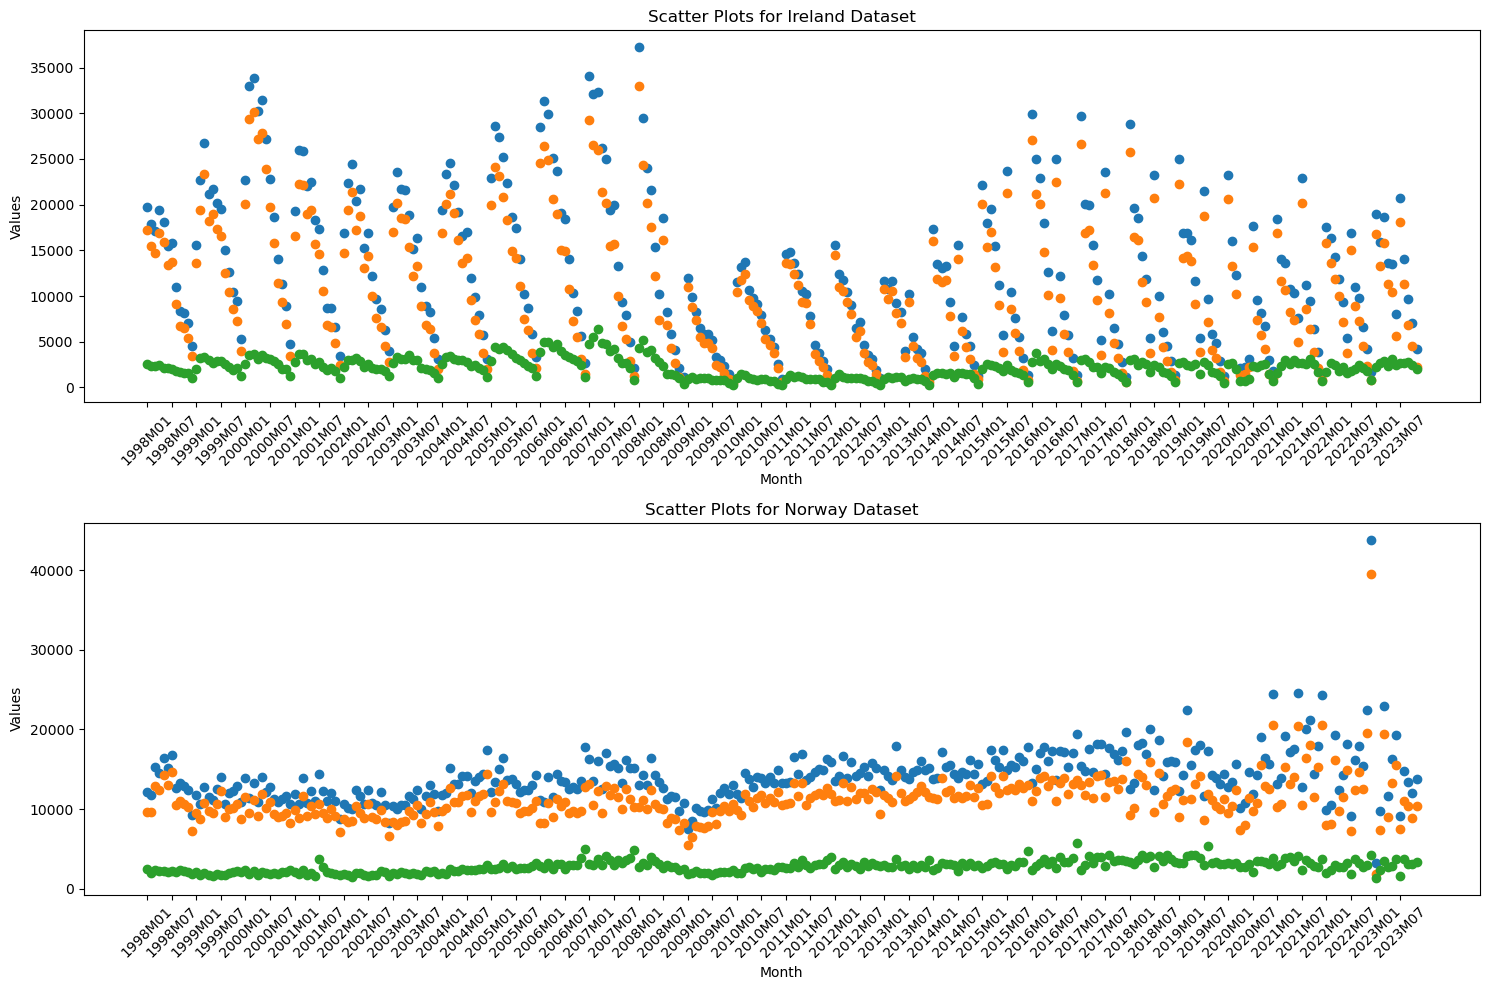

In [33]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 1, 1)
for col in ['Total New Vehicles', 'New Private Cars', 'New Goods Vehicles']:
    plt.scatter(x=dfir['Month'], y=dfir[col], label=col)
plt.title('Scatter Plots for Ireland Dataset')
plt.xlabel('Month')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.gca().set_xticks(dfir['Month'][::6])  

plt.subplot(2, 1, 2)
for col in ['Total New Vehicles', 'New Private Cars', 'New Goods Vehicles']:
    plt.scatter(x=dfnor['Month'], y=dfnor[col], label=col)
plt.title('Scatter Plots for Norway Dataset')
plt.xlabel('Month')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.gca().set_xticks(dfnor['Month'][::6]) 

plt.tight_layout()
plt.show()


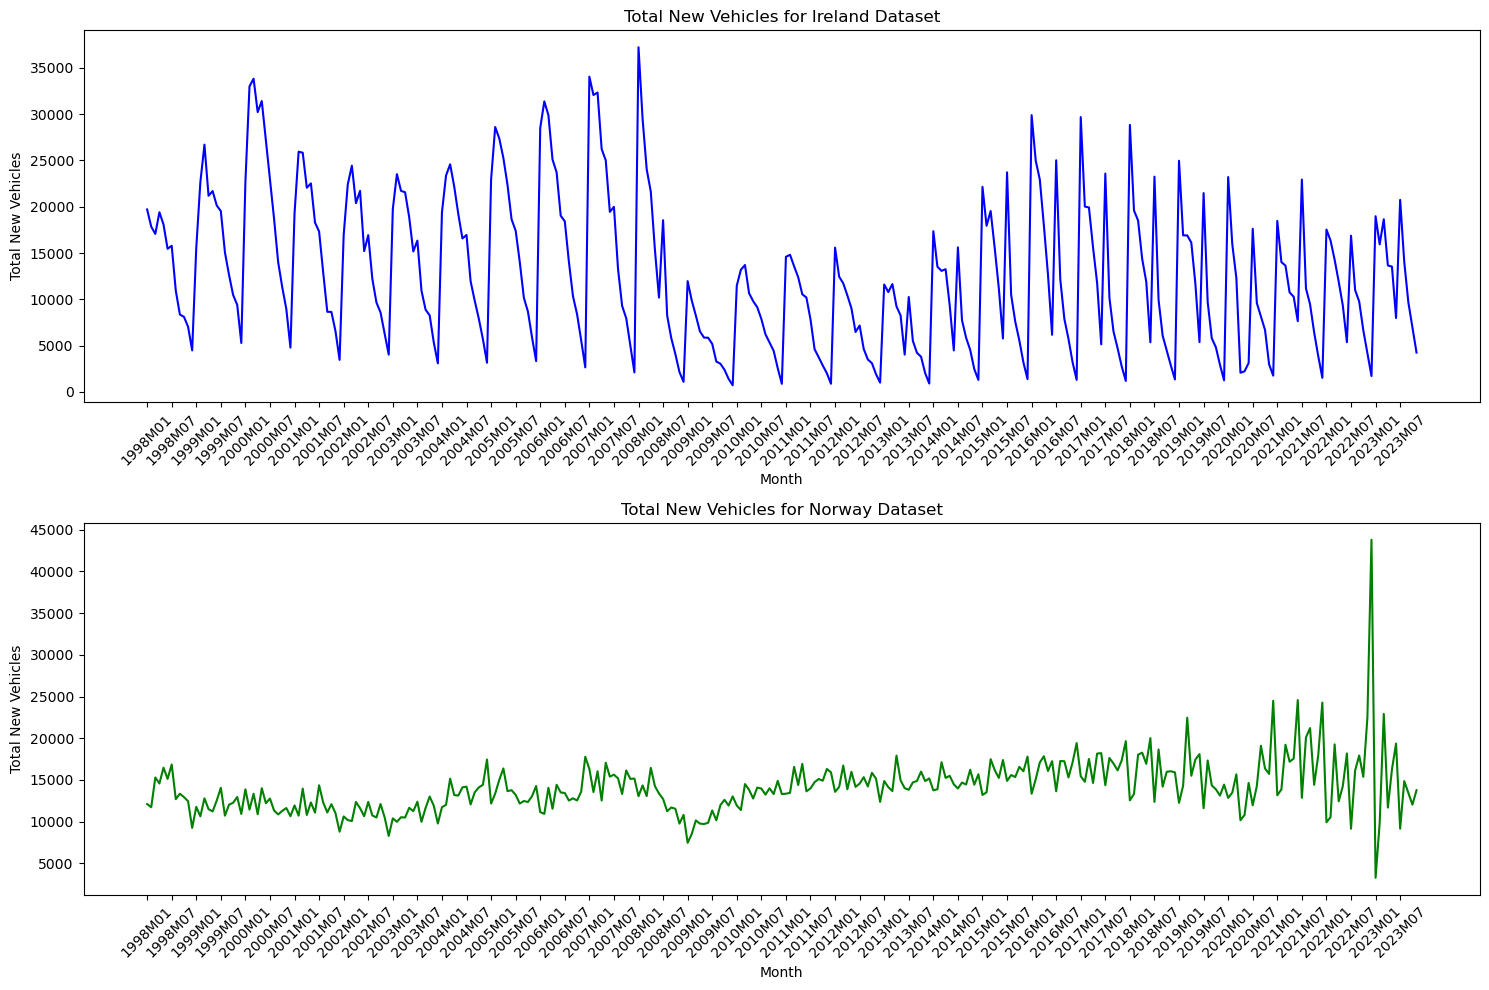

In [34]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 1, 1)
plt.plot(dfir['Month'], dfir['Total New Vehicles'], label='Total New Vehicles', color='blue')
plt.title('Total New Vehicles for Ireland Dataset')
plt.xlabel('Month')
plt.ylabel('Total New Vehicles')
plt.xticks(rotation=45)
plt.gca().set_xticks(dfir['Month'][::6]) 

plt.subplot(2, 1, 2)
plt.plot(dfnor['Month'], dfnor['Total New Vehicles'], label='Total New Vehicles', color='green')
plt.title('Total New Vehicles for Norway Dataset')
plt.xlabel('Month')
plt.ylabel('Total New Vehicles')
plt.xticks(rotation=45)
plt.gca().set_xticks(dfnor['Month'][::6])

plt.tight_layout()
plt.show()


## 2. Inferential Statistics

burada Month sutunundaki verilerde M harfi yer aldigi icin belli bir grup olarak ikiye bolme de sikinti yasadim ve bunu M harfini tum data setinden kaldirmakta buldum

In [35]:
dfir['Month'] = dfir['Month'].str.replace('M', '').astype(int)
dfnor['Month'] = dfnor['Month'].str.replace('M', '').astype(int)

In [36]:
ir_popu = pd.read_csv("PEA15.Population.csv")
ir_popu.head()

,STATISTIC Label,Year,Component,UNIT,VALUE
0,Annual Population Change,1998,Population,Thousand,3703.1
1,Annual Population Change,1999,Population,Thousand,3741.6
2,Annual Population Change,2000,Population,Thousand,3789.5
3,Annual Population Change,2001,Population,Thousand,3847.2
4,Annual Population Change,2002,Population,Thousand,3917.2


In [37]:
del ir_popu["STATISTIC Label"]
del ir_popu["Component"]
del ir_popu["UNIT"]
ir_popu["Population"] = ir_popu["VALUE"]*1000
del ir_popu["VALUE"]
ir_popu.head()

,Year,Population
0,1998,3703100.0
1,1999,3741600.0
2,2000,3789500.0
3,2001,3847200.0
4,2002,3917200.0


In [38]:
dfir_yearly = dfir.copy()
dfir_yearly['Year'] = (dfir_yearly['Month'] // 100).astype(int)
dfir_yearly = dfir_yearly.groupby('Year').sum()
dfir_yearly.head(10)

Taxation Class,Month,New Private Cars,New Goods Vehicles,Total New Vehicles
Year,,,,
1998,2397678,138539.0,23810.0,162349.0
1999,2398878,170322.0,30066.0,200388.0
2000,2400078,225269.0,33606.0,258875.0
2001,2401278,160908.0,30622.0,191530.0
2002,2402478,150485.0,28412.0,178897.0
2003,2403678,142992.0,30532.0,173524.0
2004,2404878,149697.0,31172.0,180869.0
2005,2406078,166373.0,38412.0,204785.0
2006,2407278,173455.0,43627.0,217082.0


In [39]:
del dfir_yearly["Month"]
from scipy import stats

merged_data = dfir_yearly.merge(ir_popu, on='Year')
merged_data['New_Vehicles_Per_100_People'] = (merged_data['Total New Vehicles'] / merged_data['Population']) * 100
mean_new_vehicles_per_100 = np.mean(merged_data['New_Vehicles_Per_100_People'])
std_new_vehicles_per_100 = np.std(merged_data['New_Vehicles_Per_100_People'], ddof=1)

confidence_interval_new_vehicles = stats.norm.interval(0.95, loc=mean_new_vehicles_per_100, scale=std_new_vehicles_per_100 / np.sqrt(len(merged_data)))

print("Average Total New Vehicles per 100 People:", mean_new_vehicles_per_100)
print("95% Confidence Interval for Total New Vehicles per 100 People:", confidence_interval_new_vehicles)


Average Total New Vehicles per 100 People: 3.510138499978996
95% Confidence Interval for Total New Vehicles per 100 People: (2.973065356411786, 4.0472116435462056)


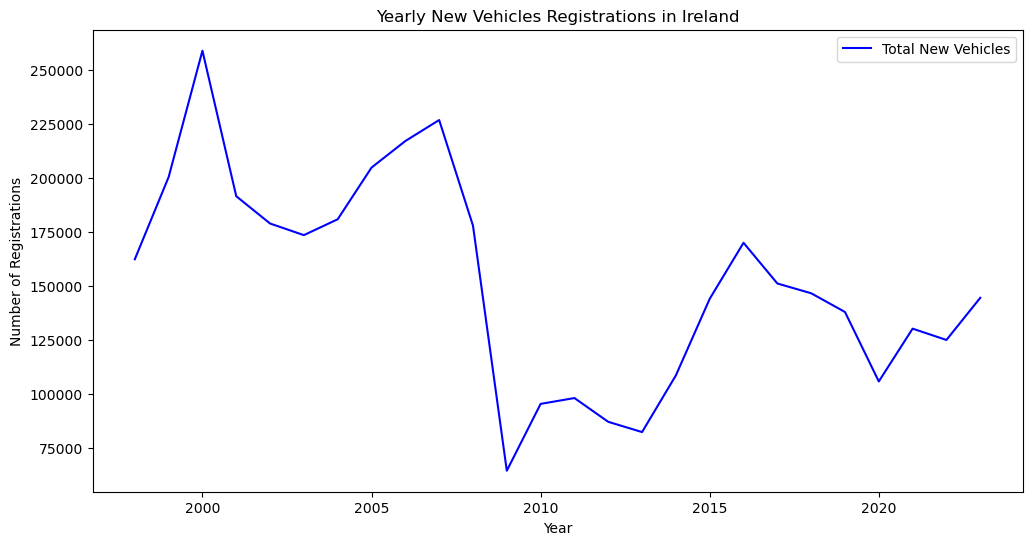

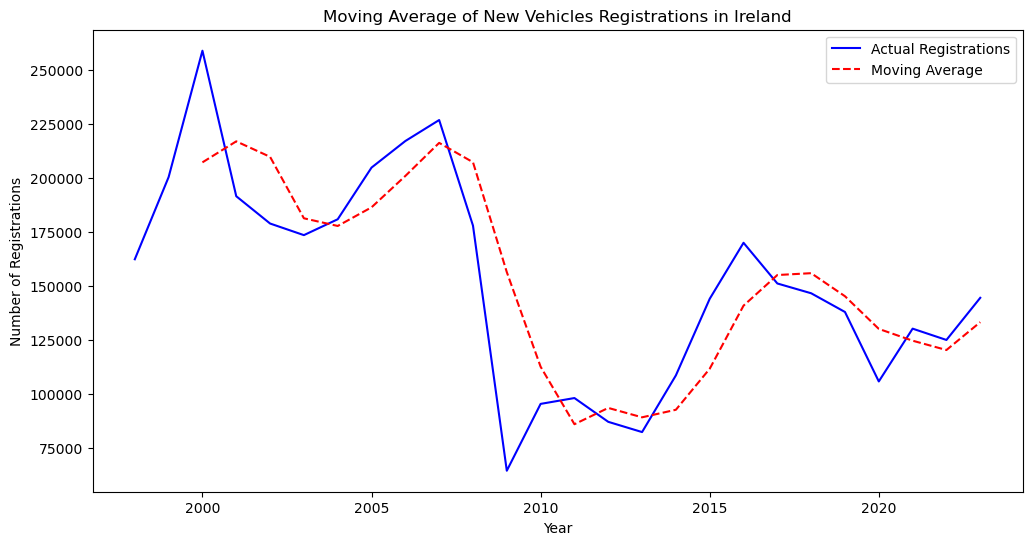

In [40]:
plt.figure(figsize=(12, 6))
plt.plot(dfir_yearly['Total New Vehicles'], label='Total New Vehicles', color='blue')
plt.title('Yearly New Vehicles Registrations in Ireland')
plt.xlabel('Year')
plt.ylabel('Number of Registrations')
plt.legend()
plt.show()

moving_average = dfir_yearly['Total New Vehicles'].rolling(window=3).mean()

plt.figure(figsize=(12, 6))
plt.plot(dfir_yearly['Total New Vehicles'], label='Actual Registrations', color='blue')
plt.plot(moving_average, label='Moving Average', color='red', linestyle='--')
plt.title('Moving Average of New Vehicles Registrations in Ireland')
plt.xlabel('Year')
plt.ylabel('Number of Registrations')
plt.legend()
plt.show()

Slope: -3511.335384615385
Intercept: 7212018.4061538465
Correlation coefficient: -0.5507492889726302
p-value: 0.0035493312757051794
Standard error: 1086.2453465146446


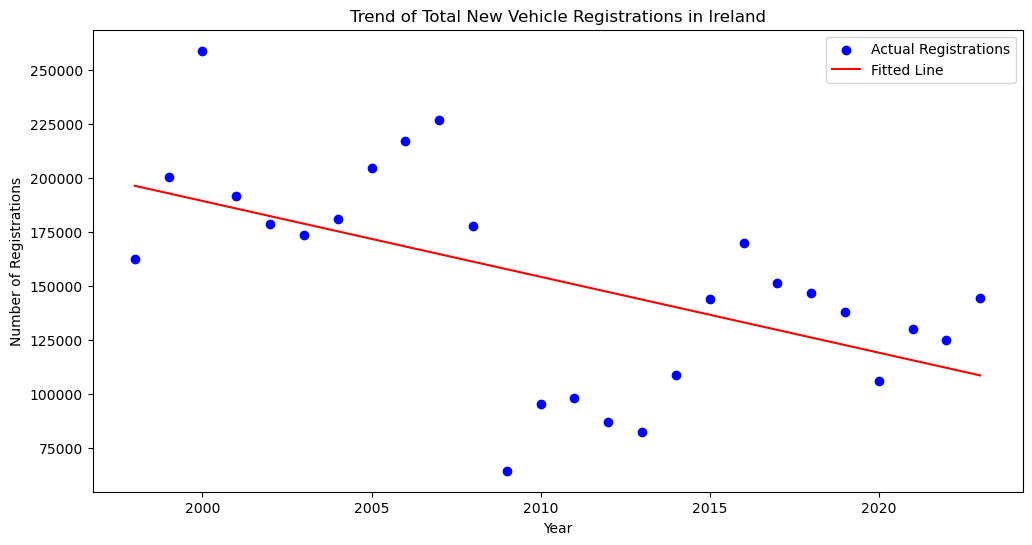

In [41]:
from scipy.stats import linregress

years = merged_data['Year']
total_vehicles = merged_data['Total New Vehicles']

slope, intercept, r_value, p_value, std_err = linregress(years, total_vehicles)

print("Slope:", slope)
print("Intercept:", intercept)
print("Correlation coefficient:", r_value)
print("p-value:", p_value)
print("Standard error:", std_err)

plt.figure(figsize=(12, 6))
plt.scatter(years, total_vehicles, color='blue', label='Actual Registrations')
plt.plot(years, intercept + slope * years, 'r', label='Fitted Line')
plt.title('Trend of Total New Vehicle Registrations in Ireland')
plt.xlabel('Year')
plt.ylabel('Number of Registrations')
plt.legend()
plt.show()

Slope: -0.1312847867854803
Intercept: 267.45820233218717
Correlation coefficient: -0.7186547779372278
p-value: 3.5433638095848916e-05
Standard error: 0.025930002699109413


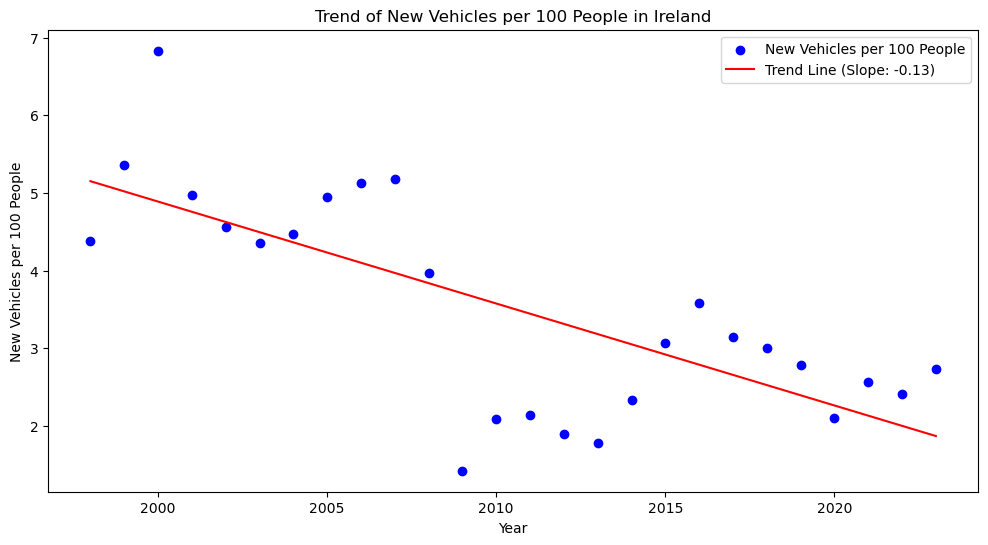

In [42]:
from scipy.stats import linregress

merged_data['Total New Vehicles Per 100 People'] = (merged_data['Total New Vehicles'] / merged_data['Population']) * 100

slope, intercept, r_value, p_value, std_err = linregress(merged_data['Year'], merged_data['Total New Vehicles Per 100 People'])

print("Slope:", slope)
print("Intercept:", intercept)
print("Correlation coefficient:", r_value)
print("p-value:", p_value)
print("Standard error:", std_err)

plt.figure(figsize=(12, 6))
plt.scatter(merged_data['Year'], merged_data['Total New Vehicles Per 100 People'], color='blue', label='New Vehicles per 100 People')
plt.plot(merged_data['Year'], intercept + slope * merged_data['Year'], 'r', label=f'Trend Line (Slope: {slope:.2f})')
plt.title('Trend of New Vehicles per 100 People in Ireland')
plt.xlabel('Year')
plt.ylabel('New Vehicles per 100 People')
plt.legend()
plt.show()


Correlation coefficient between population change and total new vehicle registrations change: -0.20348786797236407


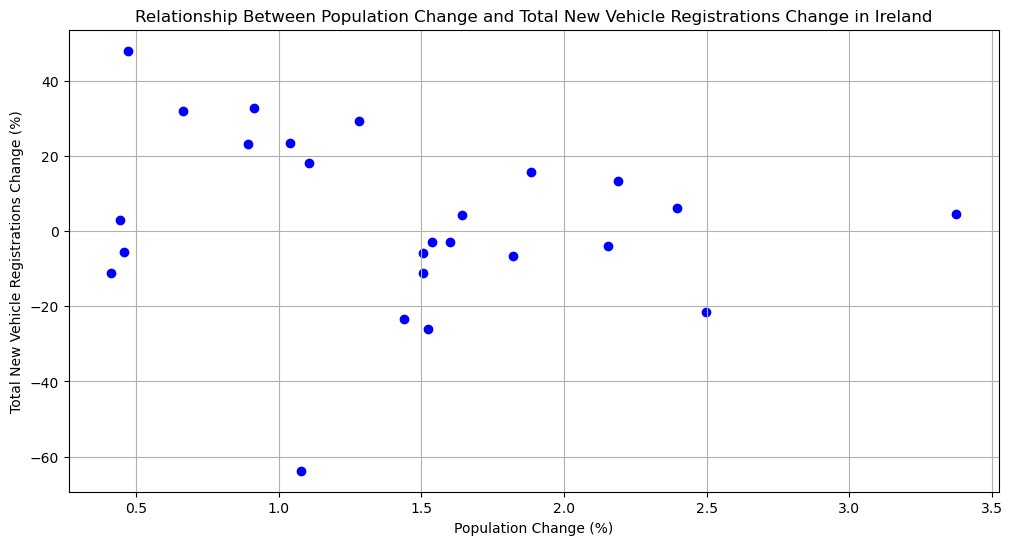

In [43]:
merged_data['Population_Change'] = merged_data['Population'].pct_change() * 100
merged_data['Total_New_Vehicles_Change'] = merged_data['Total New Vehicles'].pct_change() * 100

merged_data_clean = merged_data.dropna()

correlation = merged_data_clean['Population_Change'].corr(merged_data_clean['Total_New_Vehicles_Change'])

print("Correlation coefficient between population change and total new vehicle registrations change:", correlation)

plt.figure(figsize=(12, 6))
plt.scatter(merged_data_clean['Population_Change'], merged_data_clean['Total_New_Vehicles_Change'], color='blue')
plt.title('Relationship Between Population Change and Total New Vehicle Registrations Change in Ireland')
plt.xlabel('Population Change (%)')
plt.ylabel('Total New Vehicle Registrations Change (%)')
plt.grid(True)
plt.show()

In [44]:
merged_data.head()

,Year,New Private Cars,New Goods Vehicles,Total New Vehicles,Population,New_Vehicles_Per_100_People,Total New Vehicles Per 100 People,Population_Change,Total_New_Vehicles_Change
0,1998,138539.0,23810.0,162349.0,3703100.0,4.384138,4.384138,NaN,NaN
1,1999,170322.0,30066.0,200388.0,3741600.0,5.355677,5.355677,1.039669,23.430388
2,2000,225269.0,33606.0,258875.0,3789500.0,6.831376,6.831376,1.280201,29.186877
3,2001,160908.0,30622.0,191530.0,3847200.0,4.978426,4.978426,1.522628,-26.014486
4,2002,150485.0,28412.0,178897.0,3917200.0,4.566961,4.566961,1.819505,-6.595834


In [45]:
from scipy.stats import f_oneway

def perform_anova_test_population_vehicle(df, period=5):
    df['Period'] = (df['Year'] // period) * period
    grouped_population = df.groupby('Period')['Population'].apply(list)
    grouped_vehicles_per_100 = df.groupby('Period')['Total New Vehicles Per 100 People'].apply(list)
    grouped_new_vehicles = df.groupby('Period')['Total New Vehicles'].apply(list)

    anova_population = f_oneway(*grouped_population)
    anova_vehicles_per_100 = f_oneway(*grouped_vehicles_per_100)
    anova_new_vehicles = f_oneway(*grouped_new_vehicles)

    return anova_population, anova_vehicles_per_100, anova_new_vehicles

anova_population_result, anova_vehicles_per_100_result, anova_new_vehicles_result = perform_anova_test_population_vehicle(merged_data)
print("ANOVA Test for Population:", anova_population_result)
print("ANOVA Test for Total Vehicles per 100 People:", anova_vehicles_per_100_result)
print("ANOVA Test for Total New Vehicles:", anova_new_vehicles_result)


ANOVA Test for Population: F_onewayResult(statistic=84.77303767475127, pvalue=9.19114227648579e-13)
ANOVA Test for Total Vehicles per 100 People: F_onewayResult(statistic=8.522895708117344, pvalue=0.000187561313953382)
ANOVA Test for Total New Vehicles: F_onewayResult(statistic=5.508260951291868, pvalue=0.0023930007811472148)


In [46]:
merged_data.head()

,Year,New Private Cars,New Goods Vehicles,Total New Vehicles,Population,New_Vehicles_Per_100_People,Total New Vehicles Per 100 People,Population_Change,Total_New_Vehicles_Change,Period
0,1998,138539.0,23810.0,162349.0,3703100.0,4.384138,4.384138,NaN,NaN,1995
1,1999,170322.0,30066.0,200388.0,3741600.0,5.355677,5.355677,1.039669,23.430388,1995
2,2000,225269.0,33606.0,258875.0,3789500.0,6.831376,6.831376,1.280201,29.186877,2000
3,2001,160908.0,30622.0,191530.0,3847200.0,4.978426,4.978426,1.522628,-26.014486,2000
4,2002,150485.0,28412.0,178897.0,3917200.0,4.566961,4.566961,1.819505,-6.595834,2000


In [47]:
from scipy.stats import ttest_ind
column_names = ['Population', 'Total New Vehicles Per 100 People', 'Total New Vehicles']
def perform_t_tests_with_named_periods(df, column_names, period=5):
    results = {}
    start_year = df['Year'].min()
    df['Period'] = ((df['Year'] - start_year) // period) * period + start_year
    for column_name in column_names:
        grouped_data = df.groupby('Period')[column_name].apply(list)
        periods = list(grouped_data.index)

        t_test_results = []
        for i in range(len(periods) - 1):
            for j in range(i+1, len(periods)):
                result = ttest_ind(grouped_data[periods[i]], grouped_data[periods[j]], equal_var=False)
                period_name_i = f"{periods[i]}-{periods[i] + period - 1}"
                period_name_j = f"{periods[j]}-{periods[j] + period - 1}"
                t_test_results.append((f'Period {period_name_i} vs Period {period_name_j}', result))

        results[column_name] = t_test_results

    return results
t_test_results_named_periods = perform_t_tests_with_named_periods(merged_data, column_names)
for column, results in t_test_results_named_periods.items():
    print(f"T-Test Results for {column}:")
    for period_comparison, result in results:
        print(f"{period_comparison}: {result}")
    print("\n")

T-Test Results for Population:
Period 1998-2002 vs Period 2003-2007: TtestResult(statistic=-4.442513904518183, pvalue=0.004079810083784083, df=6.1692274704632055)
Period 1998-2002 vs Period 2008-2012: TtestResult(statistic=-17.670424546736363, pvalue=2.722757377031448e-06, df=5.838136740340269)
Period 1998-2002 vs Period 2013-2017: TtestResult(statistic=-17.458296592710298, pvalue=1.2852873577098603e-07, df=7.940483651673205)
Period 1998-2002 vs Period 2018-2022: TtestResult(statistic=-19.312495453787673, pvalue=1.3314571816393828e-07, df=7.401651726257486)
Period 1998-2002 vs Period 2023-2027: TtestResult(statistic=nan, pvalue=nan, df=1.0)
Period 2003-2007 vs Period 2008-2012: TtestResult(statistic=-5.4495136983334875, pvalue=0.003716909509727537, df=4.57085427938204)
Period 2003-2007 vs Period 2013-2017: TtestResult(statistic=-6.985761666991728, pvalue=0.00047197693999255253, df=5.867318595831621)
Period 2003-2007 vs Period 2018-2022: TtestResult(statistic=-10.08617423081174, pvalue=

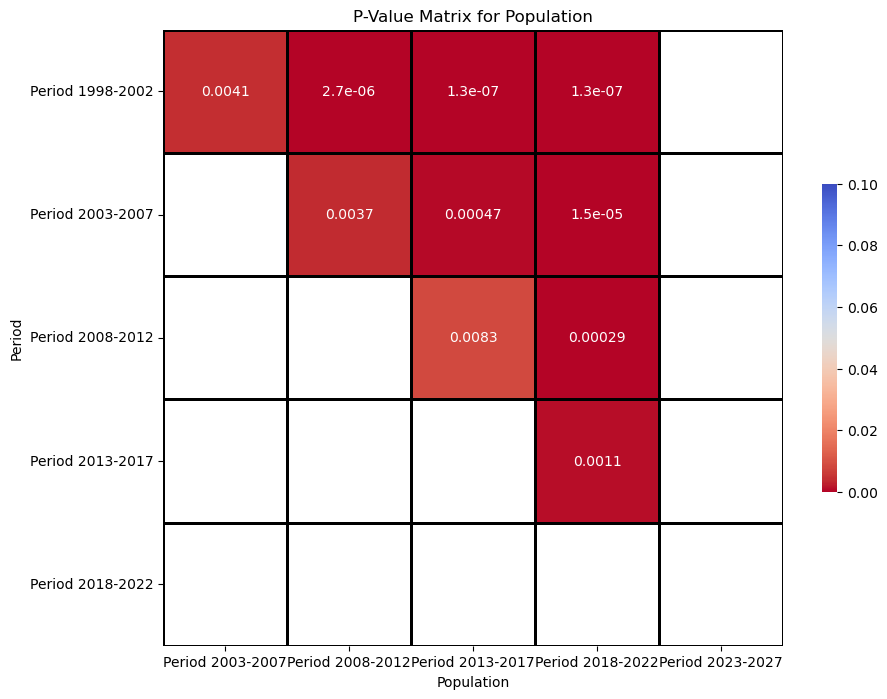

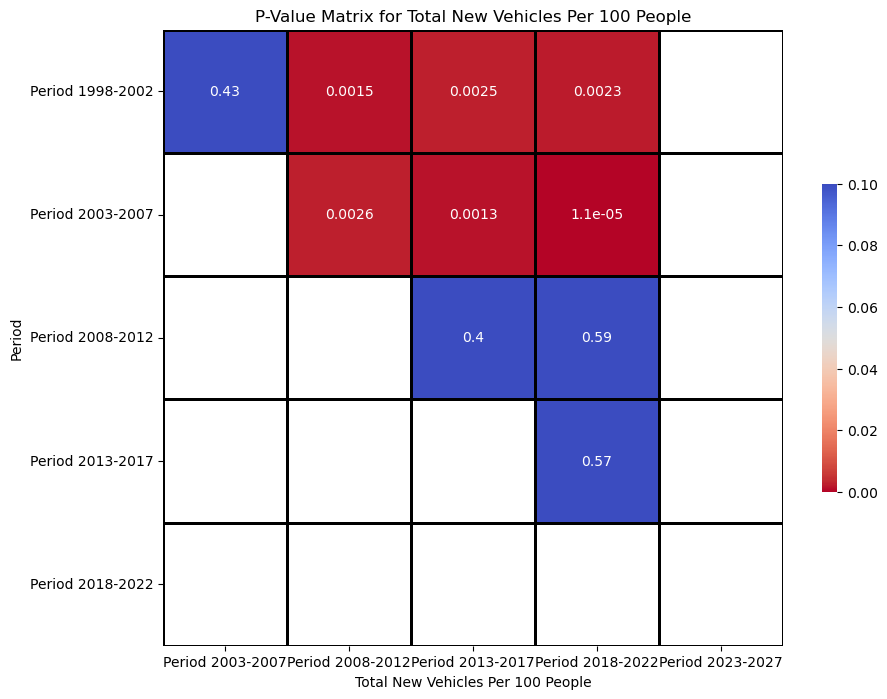

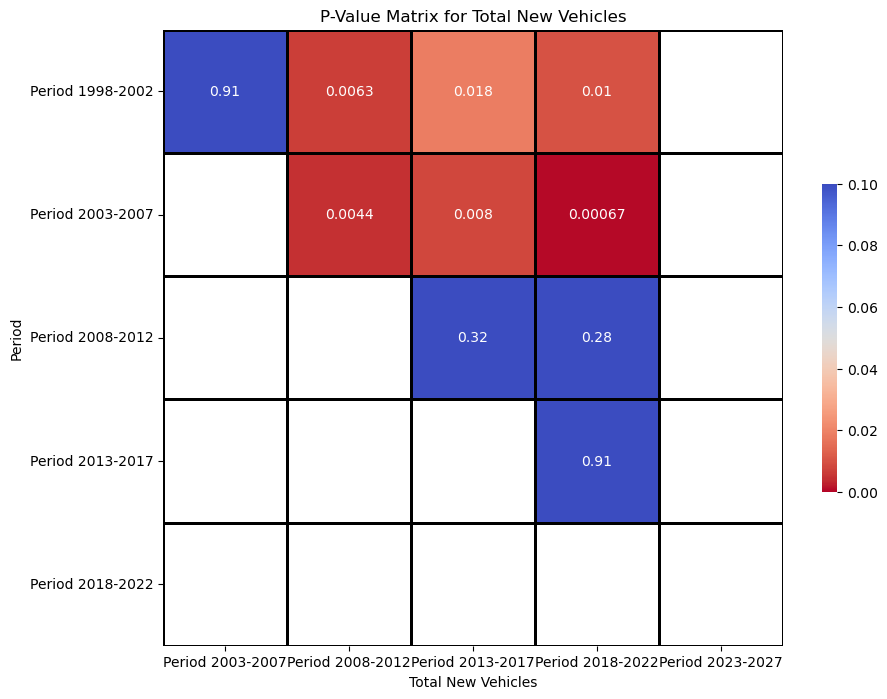

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

def create_p_value_matrix(t_test_results, column_names):
    p_value_matrix = {column: {} for column in column_names}
    for column, results in t_test_results.items():
        for period_comparison, test_result in results:
            period_i, period_j = period_comparison.split(' vs ')
            p_value_matrix[column].setdefault(period_i, {})[period_j] = test_result.pvalue

    p_value_df_list = []
    for column, matrix in p_value_matrix.items():
        df = pd.DataFrame(matrix).T 
        df = df.reindex(sorted(df.columns), axis=1)  
        df = df.reindex(sorted(df.index), axis=0) 
        df.insert(0, 'Period', df.index)
        df = df.set_index('Period')
        df.columns.name = column
        p_value_df_list.append(df)
    
    return p_value_df_list
p_value_matrices = create_p_value_matrix(t_test_results_named_periods, column_names)

for i, p_value_df in enumerate(p_value_matrices):
    plt.figure(figsize=(10, 8))
    sns.heatmap(p_value_df, annot=True, fmt=".2g", cmap='coolwarm_r',
                cbar=True, linewidths=1, linecolor='black',
                center=0.05, cbar_kws={"shrink": .5},
                vmin=0, vmax=0.1)
    plt.title(f'P-Value Matrix for {p_value_df.columns.name}')
    plt.show()


In [49]:
import ipywidgets as widgets
from IPython.display import display
def t_test_with_widgets_updated(df):
    column_dropdown = widgets.Dropdown(
        options=['Total New Vehicles', 'Population', 'Total New Vehicles Per 100 People'],
        description='Column:'
    )
    periods = sorted(df['Period'].unique())
    period_options = [(f"{period}-{period + 4}", period) for period in periods]
    period_dropdown_1 = widgets.Dropdown(
        options=period_options,
        description='Period 1:'
    )
    period_dropdown_2 = widgets.Dropdown(
        options=period_options,
        description='Period 2:'
    )
    def perform_and_display_t_test(column, period1, period2):
        group1 = df[df['Period'] == period1][column].dropna()
        group2 = df[df['Period'] == period2][column].dropna()
        t_stat, p_val = ttest_ind(group1, group2, equal_var=False)
        print(f"T-Test between {period1}-{period1 + 4} and {period2}-{period2 + 4} for '{column}':")
        print(f"T-statistic: {t_stat:.4f}, p-value: {p_val:.4f}")

    button = widgets.Button(description="Run T-Test")
    button.on_click(lambda b: perform_and_display_t_test(
        column_dropdown.value, 
        period_dropdown_1.value, 
        period_dropdown_2.value
    ))

    display(column_dropdown, period_dropdown_1, period_dropdown_2, button)
t_test_with_widgets_updated(merged_data)

Dropdown(description='Column:', options=('Total New Vehicles', 'Population', 'Total New Vehicles Per 100 Peopl…

Dropdown(description='Period 1:', options=(('1998-2002', 1998), ('2003-2007', 2003), ('2008-2012', 2008), ('20…

Dropdown(description='Period 2:', options=(('1998-2002', 1998), ('2003-2007', 2003), ('2008-2012', 2008), ('20…

Button(description='Run T-Test', style=ButtonStyle())

## Comparative Inferential Statistics Between 2 Countries

In [50]:
from scipy.stats import shapiro
column_names_all = ['New Private Cars', 'New Goods Vehicles', 'Total New Vehicles']
for col in column_names_all:
    shapiro_result_ir = shapiro(dfir[col])
    shapiro_result_nor = shapiro(dfnor[col])
    print(f"Shapiro-Wilk Test (Ireland) for {col}:")
    print(f"Statistic: {shapiro_result_ir.statistic}, p-value: {shapiro_result_ir.pvalue:.4f}")

    print(f"Shapiro-Wilk Test (Norway) for {col}:")
    print(f"Statistic: {shapiro_result_nor.statistic}, p-value: {shapiro_result_nor.pvalue:.4f}")


Shapiro-Wilk Test (Ireland) for New Private Cars:
Statistic: 0.9474709033966064, p-value: 0.0000
Shapiro-Wilk Test (Norway) for New Private Cars:
Statistic: 0.7884697318077087, p-value: 0.0000
Shapiro-Wilk Test (Ireland) for New Goods Vehicles:
Statistic: 0.966899573802948, p-value: 0.0000
Shapiro-Wilk Test (Norway) for New Goods Vehicles:
Statistic: 0.9712209105491638, p-value: 0.0000
Shapiro-Wilk Test (Ireland) for Total New Vehicles:
Statistic: 0.9541034698486328, p-value: 0.0000
Shapiro-Wilk Test (Norway) for Total New Vehicles:
Statistic: 0.849543571472168, p-value: 0.0000


In [51]:
dfir_with_year = dfir.copy()
dfnor_with_year = dfnor.copy()

dfir_with_year['Year'] = dfir_with_year['Month'].astype(str).str[:4].astype(int)
dfnor_with_year['Year'] = dfnor_with_year['Month'].astype(str).str[:4].astype(int)

dfir_with_year.head(), dfnor_with_year.head()

(Taxation Class   Month  New Private Cars  New Goods Vehicles  \
 0               199801           17192.0              2518.0   
 1               199802           15480.0              2377.0   
 2               199803           14703.0              2366.0   
 3               199804           16903.0              2507.0   
 4               199805           15921.0              2172.0   
 
 Taxation Class  Total New Vehicles  Year  
 0                          19710.0  1998  
 1                          17857.0  1998  
 2                          17069.0  1998  
 3                          19410.0  1998  
 4                          18093.0  1998  ,
     Month  New Private Cars  New Goods Vehicles  Total New Vehicles  Year
 0  199801              9639                2465               12104  1998
 1  199802              9687                2034               11721  1998
 2  199803             12913                2376               15289  1998
 3  199804             12349               

In [52]:
from scipy.stats import normaltest
def perform_dagostinos_tests_comparison(df1, df2, column_names, period=5):
    results = {}
    start_year = min(df1['Year'].min(), df2['Year'].min())
    end_year = min(df1['Year'].max(), df2['Year'].max())
    df1['Period'] = ((df1['Year'] - start_year) // period) * period + start_year
    df2['Period'] = ((df2['Year'] - start_year) // period) * period + start_year

    for column_name in column_names:
        grouped_data1 = df1.groupby('Period')[column_name].apply(list)
        grouped_data2 = df2.groupby('Period')[column_name].apply(list)
        periods = sorted(list(set(grouped_data1.index).intersection(grouped_data2.index)))

        dagostino_test_results = []
        for period in periods:
            if period + 4 <= end_year:  
                data1 = grouped_data1[period]
                data2 = grouped_data2[period]
                if len(data1) >= 8 and len(data2) >= 8:  
                    result1 = normaltest(data1)
                    result2 = normaltest(data2)
                    period_name = f"{period}-{period + 4}"
                    dagostino_test_results.append((f'Period {period_name}', result1, result2))

        results[column_name] = dagostino_test_results

    return results

dagostino_results_comparison = perform_dagostinos_tests_comparison(dfir_with_year, dfnor_with_year, column_names_all)
for column, results in dagostino_results_comparison.items():
    print(f"D'Agostino's K^2 Test Results for {column}:")
    for period_comparison, result1, result2 in results:
        print(f"{period_comparison}: Ireland - Statistic: {result1.statistic:.4f}, P-Value: {result1.pvalue:.4f}, "
              f"Norway - Statistic: {result2.statistic:.4f}, P-Value: {result2.pvalue:.4f}")
    print("\n")

D'Agostino's K^2 Test Results for New Private Cars:
Period 1998-2002: Ireland - Statistic: 1.7350, P-Value: 0.4200, Norway - Statistic: 9.9269, P-Value: 0.0070
Period 2003-2007: Ireland - Statistic: 11.1818, P-Value: 0.0037, Norway - Statistic: 1.0661, P-Value: 0.5868
Period 2008-2012: Ireland - Statistic: 29.2341, P-Value: 0.0000, Norway - Statistic: 5.8646, P-Value: 0.0533
Period 2013-2017: Ireland - Statistic: 5.9280, P-Value: 0.0516, Norway - Statistic: 2.4538, P-Value: 0.2932
Period 2018-2022: Ireland - Statistic: 4.9491, P-Value: 0.0842, Norway - Statistic: 66.7150, P-Value: 0.0000


D'Agostino's K^2 Test Results for New Goods Vehicles:
Period 1998-2002: Ireland - Statistic: 1.2467, P-Value: 0.5361, Norway - Statistic: 50.2807, P-Value: 0.0000
Period 2003-2007: Ireland - Statistic: 0.8921, P-Value: 0.6402, Norway - Statistic: 13.2512, P-Value: 0.0013
Period 2008-2012: Ireland - Statistic: 44.9657, P-Value: 0.0000, Norway - Statistic: 1.2355, P-Value: 0.5392
Period 2013-2017: Irel

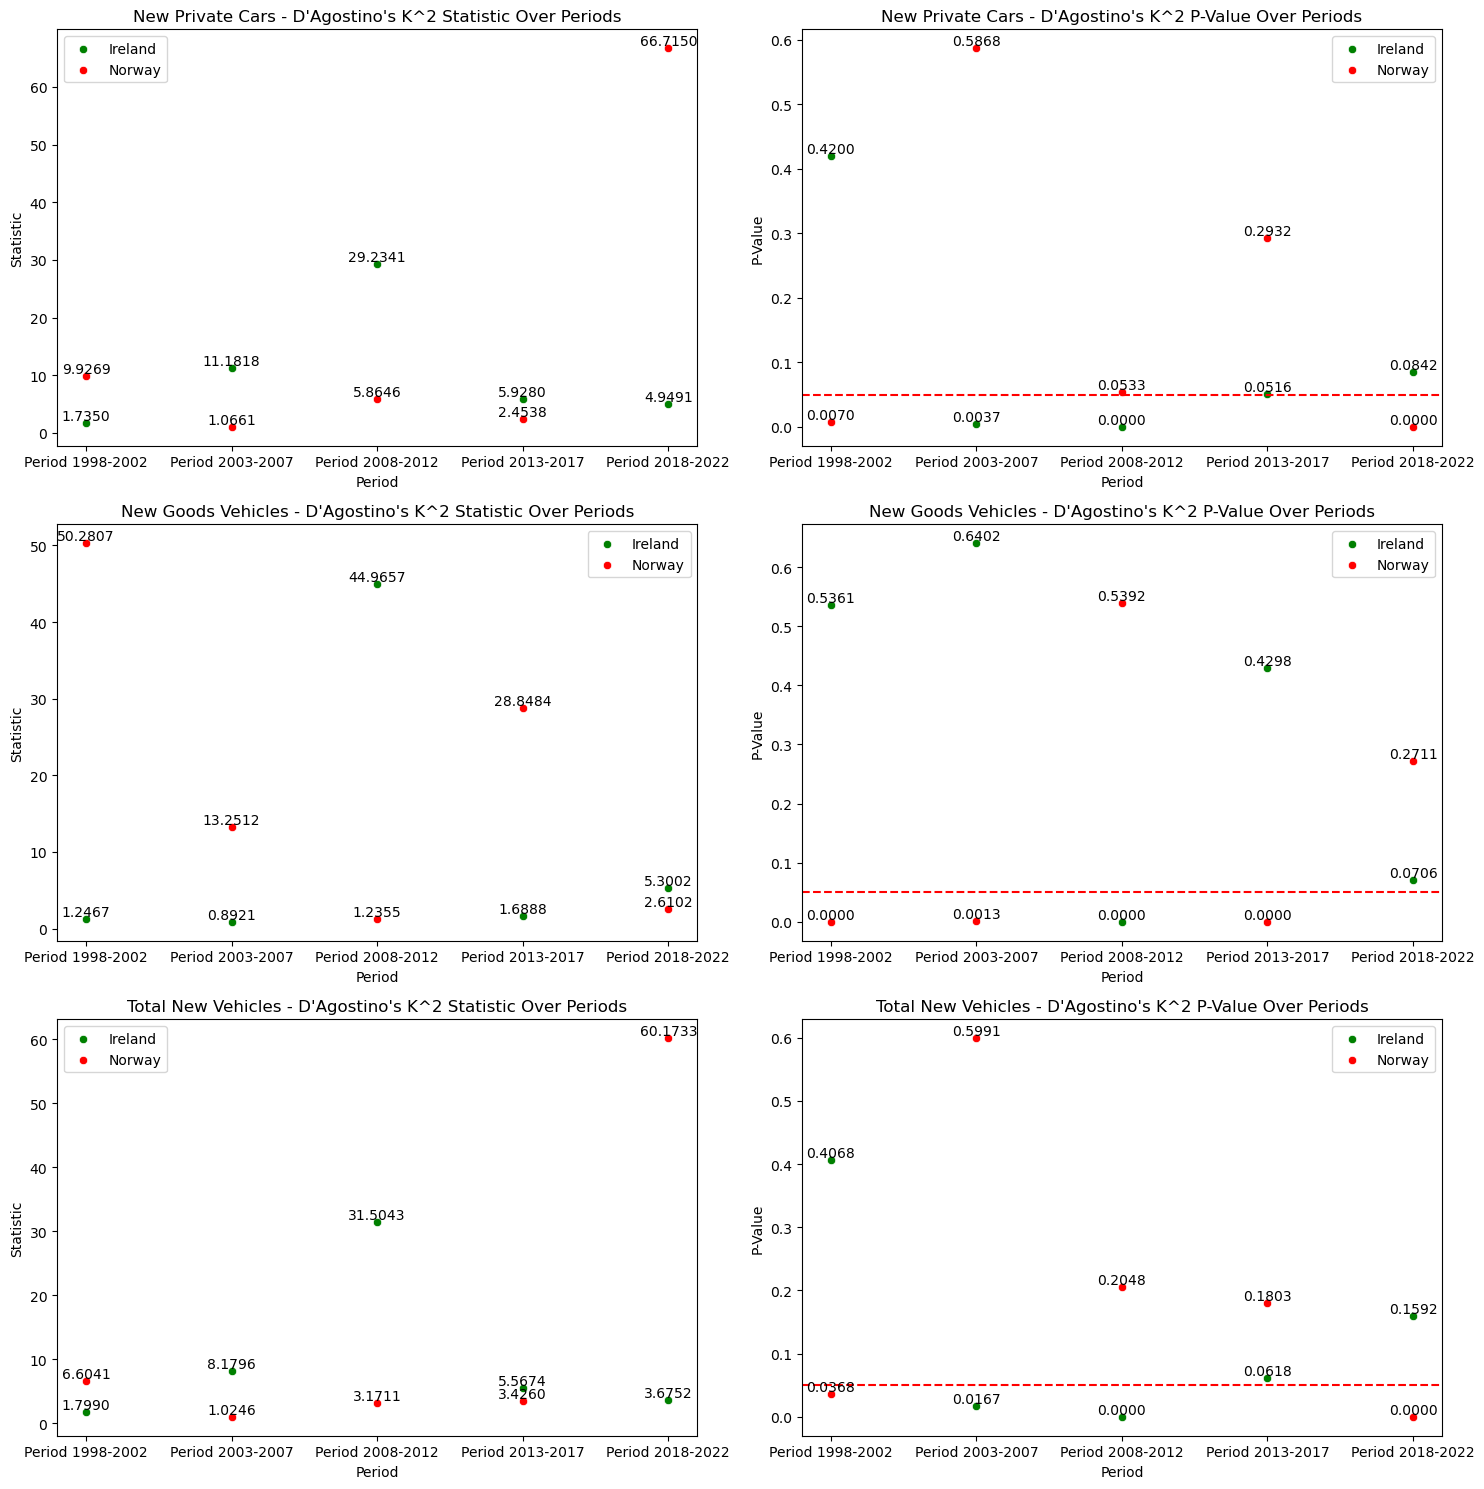

In [53]:
plot_data = []
for column, results in dagostino_results_comparison.items():
    for period_comparison, result1, result2 in results:
        plot_data.append({
            'Period': period_comparison, 
            'Statistic_Ireland': result1.statistic, 
            'P-Value_Ireland': result1.pvalue, 
            'Statistic_Norway': result2.statistic, 
            'P-Value_Norway': result2.pvalue, 
            'Column': column
        })

plot_df = pd.DataFrame(plot_data)
fig, axes = plt.subplots(nrows=len(column_names_all), ncols=2, figsize=(15, 5 * len(column_names_all)))

for i, col in enumerate(column_names_all):
    ireland_statistic = sns.scatterplot(x='Period', y='Statistic_Ireland', data=plot_df[plot_df['Column'] == col], ax=axes[i, 0], color='green', label='Ireland')
    norway_statistic = sns.scatterplot(x='Period', y='Statistic_Norway', data=plot_df[plot_df['Column'] == col], ax=axes[i, 0], color='red', label='Norway')
    
    for x, y in zip(plot_df[plot_df['Column'] == col]['Period'], plot_df[plot_df['Column'] == col]['Statistic_Ireland']):
        axes[i, 0].text(x, y, f'{y:.4f}', color='black', ha='center', va='bottom')
    for x, y in zip(plot_df[plot_df['Column'] == col]['Period'], plot_df[plot_df['Column'] == col]['Statistic_Norway']):
        axes[i, 0].text(x, y, f'{y:.4f}', color='black', ha='center', va='bottom')

    axes[i, 0].set_title(f'{col} - D\'Agostino\'s K^2 Statistic Over Periods')
    axes[i, 0].set_ylabel('Statistic')
    axes[i, 0].set_xlabel('Period')
    axes[i, 0].legend()

    ireland_pvalue = sns.scatterplot(x='Period', y='P-Value_Ireland', data=plot_df[plot_df['Column'] == col], ax=axes[i, 1], color='green', label='Ireland')
    norway_pvalue = sns.scatterplot(x='Period', y='P-Value_Norway', data=plot_df[plot_df['Column'] == col], ax=axes[i, 1], color='red', label='Norway')

    for x, y in zip(plot_df[plot_df['Column'] == col]['Period'], plot_df[plot_df['Column'] == col]['P-Value_Ireland']):
        axes[i, 1].text(x, y, f'{y:.4f}', color='black', ha='center', va='bottom')
    for x, y in zip(plot_df[plot_df['Column'] == col]['Period'], plot_df[plot_df['Column'] == col]['P-Value_Norway']):
        axes[i, 1].text(x, y, f'{y:.4f}', color='black', ha='center', va='bottom')

    axes[i, 1].set_title(f'{col} - D\'Agostino\'s K^2 P-Value Over Periods')
    axes[i, 1].set_ylabel('P-Value')
    axes[i, 1].set_xlabel('Period')
    axes[i, 1].legend()
    axes[i, 1].axhline(0.05, ls='--', color='red')  # Significance level

plt.tight_layout()
plt.show()


In [54]:
import pandas as pd
from statsmodels.tsa.stattools import grangercausalitytests

dfir_filtered = dfir[(dfir['Month'] >= 200600) & (dfir['Month'] <= 201012)]
dfnor_filtered = dfnor[(dfnor['Month'] >= 200600) & (dfnor['Month'] <= 201012)]

column_names_all = ['New Private Cars', 'New Goods Vehicles', 'Total New Vehicles']
granger_test_results = {}

for col in column_names_all:
    combined_data = pd.concat([dfir_filtered[col], dfnor_filtered[col]], axis=1)
    granger_test_results[col] = grangercausalitytests(combined_data, maxlag=12, verbose=False)

for col, results in granger_test_results.items():
    print(f"Granger Nedensellik Testi sonuçları - {col}:")
    for lag, test in results.items():
        f_stat = test[0]['ssr_ftest'][0]
        p_value = test[0]['ssr_ftest'][1]
        print(f"  Lag: {lag}, F-Stat: {f_stat:.4f}, P-Value: {p_value:.4f}")
    print()

Granger Nedensellik Testi sonuçları - New Private Cars:
  Lag: 1, F-Stat: 0.5665, P-Value: 0.4548
  Lag: 2, F-Stat: 0.5095, P-Value: 0.6037
  Lag: 3, F-Stat: 0.7253, P-Value: 0.5417
  Lag: 4, F-Stat: 1.0804, P-Value: 0.3770
  Lag: 5, F-Stat: 0.9892, P-Value: 0.4353
  Lag: 6, F-Stat: 1.3145, P-Value: 0.2726
  Lag: 7, F-Stat: 1.2308, P-Value: 0.3104
  Lag: 8, F-Stat: 1.2205, P-Value: 0.3161
  Lag: 9, F-Stat: 1.2664, P-Value: 0.2924
  Lag: 10, F-Stat: 1.6367, P-Value: 0.1455
  Lag: 11, F-Stat: 2.2267, P-Value: 0.0457
  Lag: 12, F-Stat: 4.6120, P-Value: 0.0008

Granger Nedensellik Testi sonuçları - New Goods Vehicles:
  Lag: 1, F-Stat: 7.9910, P-Value: 0.0065
  Lag: 2, F-Stat: 9.1998, P-Value: 0.0004
  Lag: 3, F-Stat: 8.1116, P-Value: 0.0002
  Lag: 4, F-Stat: 6.9779, P-Value: 0.0002
  Lag: 5, F-Stat: 5.5296, P-Value: 0.0005
  Lag: 6, F-Stat: 5.5233, P-Value: 0.0003
  Lag: 7, F-Stat: 4.7898, P-Value: 0.0006
  Lag: 8, F-Stat: 4.8410, P-Value: 0.0005
  Lag: 9, F-Stat: 4.6094, P-Value: 0.0006


### t-Test (Independent Two-Sample)

Null Hipotez (H0):
İrlanda ve Norveç arasında "New Private Cars" ve "Total New Vehicles" sütunları için 2013 yılında ortalama değerler açısından istatistiksel olarak anlamlı bir fark yoktur.

Alternatif Hipotez (H1):
İrlanda ve Norveç arasında "New Private Cars" ve "Total New Vehicles" sütunları için 2013 yılında ortalama değerler açısından istatistiksel olarak anlamlı bir fark vardır.

Yorumlama
Eğer T-Testi sonucunda elde edilen p-değeri belirlenen anlamlılık düzeyinden (genellikle 0.05) küçükse, null hipotezi reddedilir ve İrlanda ve Norveç arasında ortalama değerler açısından anlamlı bir fark olduğu sonucuna varılır.
Eğer p-değeri belirlenen anlamlılık düzeyinden büyükse, null hipotezi reddedilemez ve İrlanda ve Norveç arasında ortalama değerler açısından anlamlı bir fark olmadığı sonucuna varılır.
Bu durumda, her iki sütun için elde edilen düşük p-değerleri, İrlanda ve Norveç arasında bu sütunlardaki ortalama değerler açısından istatistiksel olarak anlamlı farklılıklar olduğunu gösterir ve bu nedenle null hipotezi reddedilir.

In [55]:
from scipy.stats import ttest_ind

irl_2013 = dfir_with_year[dfir_with_year['Year'] == 2013]
nor_2013 = dfnor_with_year[dfnor_with_year['Year'] == 2013]

t_test_results = {}
columns_to_ttest = ['New Private Cars', 'Total New Vehicles']

for col in columns_to_ttest:
    result = ttest_ind(irl_2013[col], nor_2013[col], equal_var=False)
    t_test_results[col] = result
    
for col, result in t_test_results.items():
    print(f"T-Test for {col} (2013): Statistic: {result.statistic:.4f}, P-Value: {result.pvalue:.4e}")


T-Test for New Private Cars (2013): Statistic: -5.4191, P-Value: 1.4127e-04
T-Test for Total New Vehicles (2013): Statistic: -6.9059, P-Value: 1.1123e-05


### Mann-Whitney U Test

Hypothesis: There is no statistically significant difference in the median numbers of 'New Private Cars' sold in Ireland and Norway.

In [56]:
from scipy.stats import mannwhitneyu
for col in column_names_all:
    mann_whitney_result = mannwhitneyu(dfir[col], dfnor[col])
    print(f"Mann-Whitney U Test for {col} - Statistic: {mann_whitney_result.statistic:.4f}, P-Value: {mann_whitney_result.pvalue:.4f}")


Mann-Whitney U Test for New Private Cars - Statistic: 41516.0000, P-Value: 0.0023
Mann-Whitney U Test for New Goods Vehicles - Statistic: 28298.5000, P-Value: 0.0000
Mann-Whitney U Test for Total New Vehicles - Statistic: 39211.0000, P-Value: 0.0000


In [57]:
dfnor_yearly = dfnor.copy()
dfnor_yearly['Year'] = (dfnor_yearly['Month'] // 100).astype(int)
dfnor_yearly = dfnor_yearly.groupby('Year').sum()
dfnor_yearly.head(10)
del dfnor_yearly ['Month']
dfir_with_year_grouped = dfir_with_year.groupby('Year')
dfnor_with_year_grouped = dfnor_with_year.groupby('Year')
dfnor_yearly.head()

,New Private Cars,New Goods Vehicles,Total New Vehicles
Year,,,
1998,136340,26435,162775
1999,120109,23210,143319
2000,119801,24450,144251
2001,114706,25678,140384
2002,107917,22044,129961


In [58]:
from scipy.stats import mannwhitneyu

mann_whitney_results = {}

for year in range(1998, 2024):
    if year in dfir_with_year_grouped.groups and year in dfnor_with_year_grouped.groups:
        print(f"Year: {year}")
        dfir_year = dfir_with_year_grouped.get_group(year)
        dfnor_year = dfnor_with_year_grouped.get_group(year)

        mann_whitney_results[year] = {}
        for col in column_names_all:
            mw_result = mannwhitneyu(dfir_year[col], dfnor_year[col], alternative='two-sided')
            mann_whitney_results[year][col] = (mw_result.statistic, mw_result.pvalue)
            print(f"  Mann-Whitney U Test for {col} - Statistic: {mw_result.statistic:.4f}, P-Value: {mw_result.pvalue:.4f}")
    print()


Year: 1998
  Mann-Whitney U Test for New Private Cars - Statistic: 81.0000, P-Value: 0.6236
  Mann-Whitney U Test for New Goods Vehicles - Statistic: 53.5000, P-Value: 0.2986
  Mann-Whitney U Test for Total New Vehicles - Statistic: 81.0000, P-Value: 0.6236

Year: 1999
  Mann-Whitney U Test for New Private Cars - Statistic: 104.0000, P-Value: 0.0690
  Mann-Whitney U Test for New Goods Vehicles - Statistic: 117.0000, P-Value: 0.0102
  Mann-Whitney U Test for Total New Vehicles - Statistic: 105.0000, P-Value: 0.0606

Year: 2000
  Mann-Whitney U Test for New Private Cars - Statistic: 110.0000, P-Value: 0.0304
  Mann-Whitney U Test for New Goods Vehicles - Statistic: 118.0000, P-Value: 0.0086
  Mann-Whitney U Test for Total New Vehicles - Statistic: 112.0000, P-Value: 0.0226

Year: 2001
  Mann-Whitney U Test for New Private Cars - Statistic: 94.0000, P-Value: 0.2145
  Mann-Whitney U Test for New Goods Vehicles - Statistic: 100.0000, P-Value: 0.1124
  Mann-Whitney U Test for Total New Vehic

### Kruskal-Wallis H Test

Hypothesis: There is no statistically significant difference in the median numbers of 'Total New Vehicles' sold annually in Ireland and Norway.

In [59]:
from scipy.stats import kruskal
for col in column_names_all:
    kruskal_result = kruskal(dfir[col], dfnor[col])
    print(f"Kruskal-Wallis H Test for {col} - Statistic: {kruskal_result.statistic:.4f}, P-Value: {kruskal_result.pvalue:.4f}")


Kruskal-Wallis H Test for New Private Cars - Statistic: 9.3295, P-Value: 0.0023
Kruskal-Wallis H Test for New Goods Vehicles - Statistic: 80.1533, P-Value: 0.0000
Kruskal-Wallis H Test for Total New Vehicles - Statistic: 16.6712, P-Value: 0.0000


In [60]:
dfir_with_year_grouped = dfir_with_year.groupby('Year')
dfnor_with_year_grouped = dfnor_with_year.groupby('Year')

kruskal_results_updated = {}

for year in range(1998, 2024):
    if year in dfir_with_year_grouped.groups and year in dfnor_with_year_grouped.groups:
        print(f"Year: {year}")
        dfir_year = dfir_with_year_grouped.get_group(year)
        dfnor_year = dfnor_with_year_grouped.get_group(year)

        kruskal_results_updated[year] = {}
        for col in column_names_all:
            kruskal_result = kruskal(dfir_year[col], dfnor_year[col])
            kruskal_results_updated[year][col] = (kruskal_result.statistic, kruskal_result.pvalue)
            print(f"  Kruskal-Wallis H Test for {col} - Statistic: {kruskal_result.statistic:.4f}, P-Value: {kruskal_result.pvalue:.4f}")
    print()

Year: 1998
  Kruskal-Wallis H Test for New Private Cars - Statistic: 0.2700, P-Value: 0.6033
  Kruskal-Wallis H Test for New Goods Vehicles - Statistic: 1.1413, P-Value: 0.2854
  Kruskal-Wallis H Test for Total New Vehicles - Statistic: 0.2700, P-Value: 0.6033

Year: 1999
  Kruskal-Wallis H Test for New Private Cars - Statistic: 3.4133, P-Value: 0.0647
  Kruskal-Wallis H Test for New Goods Vehicles - Statistic: 6.7500, P-Value: 0.0094
  Kruskal-Wallis H Test for Total New Vehicles - Statistic: 3.6300, P-Value: 0.0567

Year: 2000
  Kruskal-Wallis H Test for New Private Cars - Statistic: 4.8133, P-Value: 0.0282
  Kruskal-Wallis H Test for New Goods Vehicles - Statistic: 7.0533, P-Value: 0.0079
  Kruskal-Wallis H Test for Total New Vehicles - Statistic: 5.3333, P-Value: 0.0209

Year: 2001
  Kruskal-Wallis H Test for New Private Cars - Statistic: 1.6133, P-Value: 0.2040
  Kruskal-Wallis H Test for New Goods Vehicles - Statistic: 2.6133, P-Value: 0.1060
  Kruskal-Wallis H Test for Total New

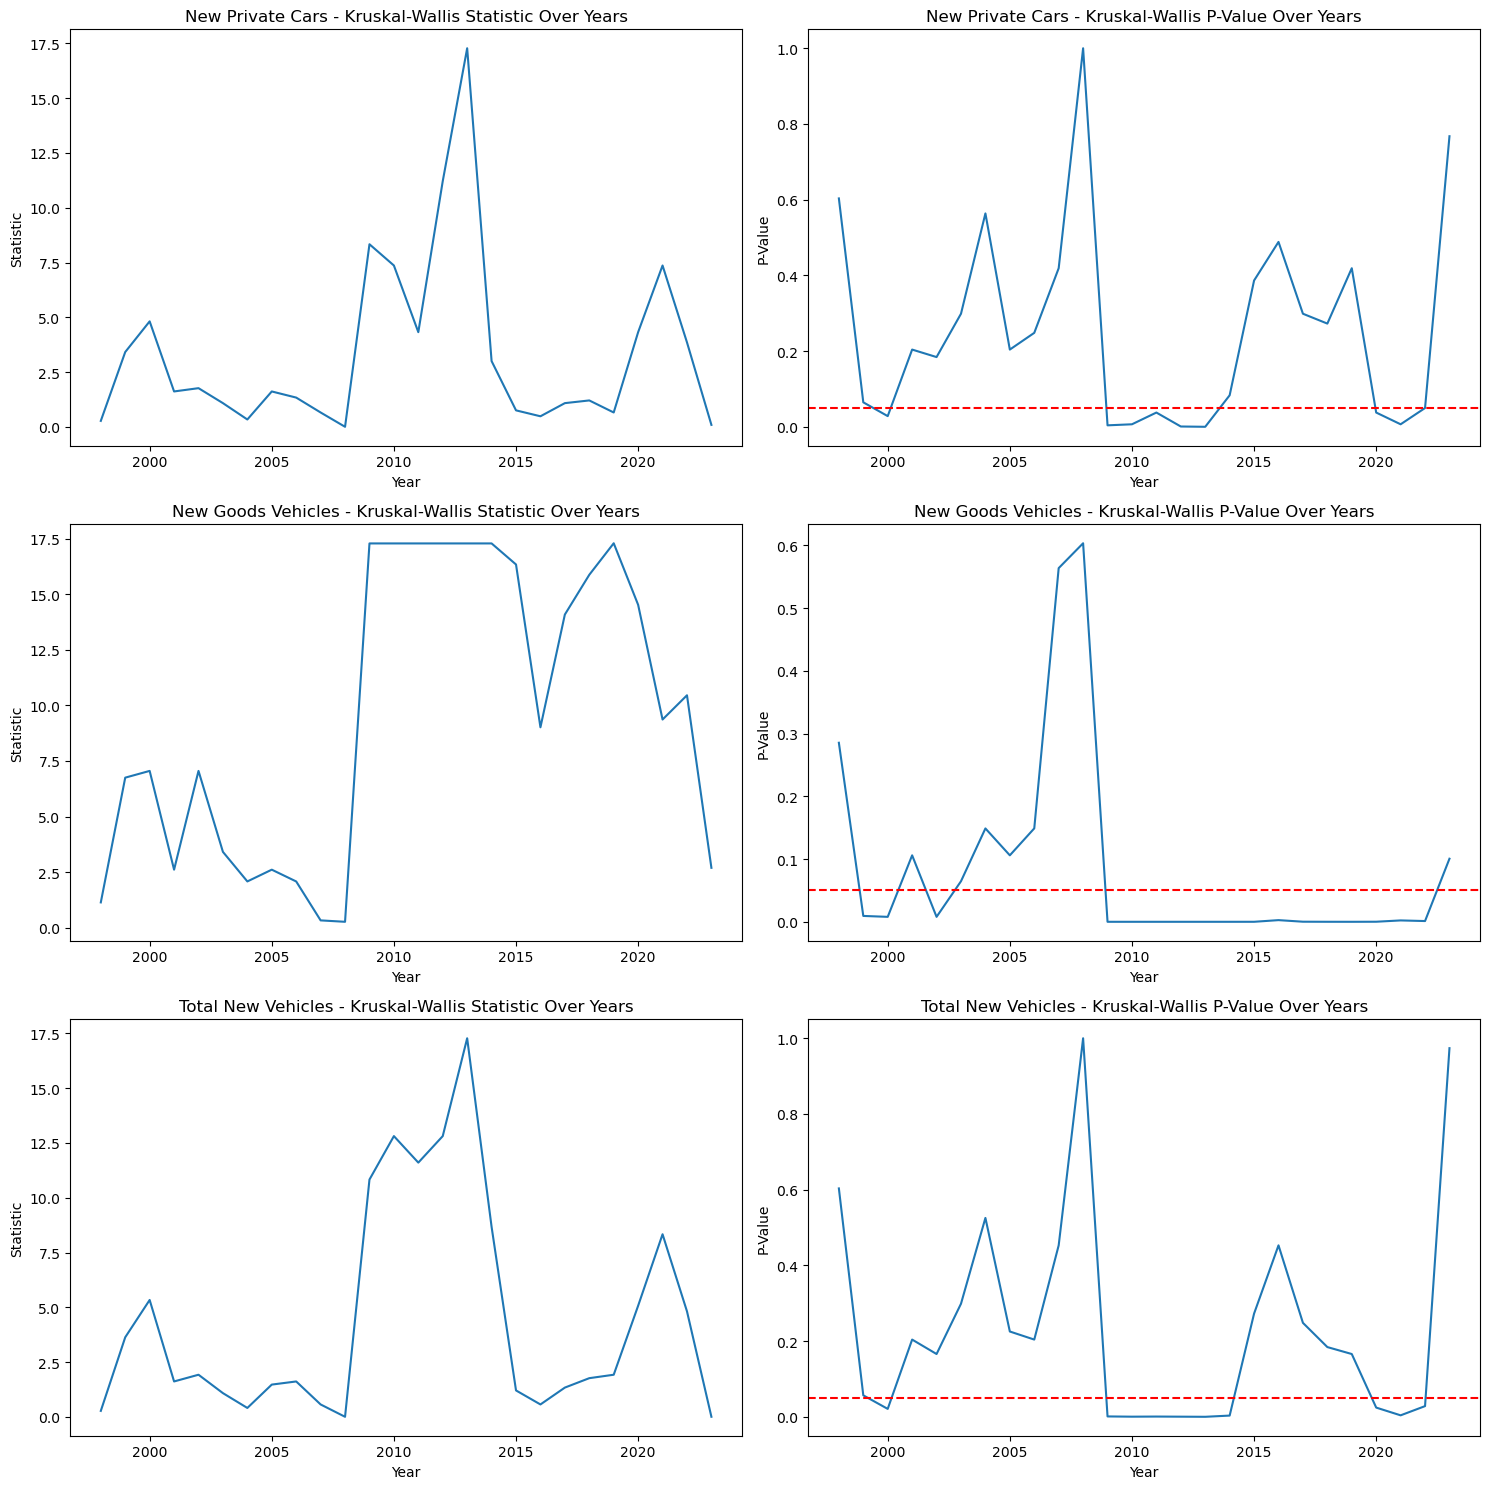

In [61]:
dataframes = {col: pd.DataFrame() for col in column_names_all}

for col in column_names_all:
    rows = []
    for year in years:
        result = kruskal_results_updated[year][col]
        rows.append({'Year': year, 'Statistic': result[0], 'P-Value': result[1]})
    dataframes[col] = pd.concat([dataframes[col], pd.DataFrame(rows)], ignore_index=True)

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))

for i, col in enumerate(column_names_all):
    sns.lineplot(x='Year', y='Statistic', data=dataframes[col], ax=axes[i, 0])
    axes[i, 0].set_title(f'{col} - Kruskal-Wallis Statistic Over Years')
    axes[i, 0].set_ylabel('Statistic')
    axes[i, 0].set_xlabel('Year')
    
    sns.lineplot(x='Year', y='P-Value', data=dataframes[col], ax=axes[i, 1])
    axes[i, 1].set_title(f'{col} - Kruskal-Wallis P-Value Over Years')
    axes[i, 1].set_ylabel('P-Value')
    axes[i, 1].set_xlabel('Year')
    axes[i, 1].axhline(0.05, ls='--', color='red')  # Significance level

plt.tight_layout()
plt.show()


Hipotezler
H0 (Null Hypothesis): Her yıl için, "New Private Cars", "New Goods Vehicles" ve "Total New Vehicles" sütunlarına ait medyan değerler arasında dfir ve dfnor veri setleri arasında istatistiksel olarak anlamlı bir fark yoktur.

H1 (Alternative Hypothesis): En az bir yılda, "New Private Cars", "New Goods Vehicles" ve "Total New Vehicles" sütunlarına ait medyan değerler arasında dfir ve dfnor veri setleri arasında istatistiksel olarak anlamlı bir fark vardır.

Grafiklerin Yorumlanması
İstatistik Değeri: Kruskal-Wallis test istatistiği, örneklem grupları arasındaki farkın büyüklüğünü ölçer. İstatistik değeri ne kadar yüksekse, gruplar arasındaki fark o kadar belirgindir.

P-Değeri: P-değeri, null hipotezin doğru olduğu durumda, gözlemlenen test istatistiğinin elde edilen değeri veya daha uç değerleri alma olasılığını ifade eder. Genel olarak, p-değeri 0.05'ten (anlamlılık seviyesi) küçük olduğunda, null hipotezi reddedilir ve örneklem grupları arasında anlamlı bir fark olduğu kabul edilir.

Grafiklerde görülen p-değerleri ve istatistik değerleri, belirli yıllarda iki veri seti arasında anlamlı farklılıkların olup olmadığını göstermektedir. P-değeri 0.05'in altındaki yıllar, bu yıllarda dfir ve dfnor veri setleri arasında anlamlı farklılıklar olduğunu gösterir ve bu durumda null hipotezi reddedilir. Diğer yıllarda, p-değeri 0.05'ten büyükse, null hipotezi reddedilemez ve gruplar arasında anlamlı bir fark olmadığı sonucuna varılır.

### Spearman's Rank Correlation

Hypothesis: There is no statistically significant rank correlation between the monthly numbers of 'Total New Vehicles' sold in Ireland and Norway.

In [62]:
from scipy.stats import spearmanr

spearman_correlation_result = spearmanr(dfir_yearly['Total New Vehicles'], dfnor_yearly['Total New Vehicles'])

print(f"Spearman's Rank Correlation Statistic: {spearman_correlation_result.statistic:.4f}, P-Value: {spearman_correlation_result.pvalue:.6f}")


Spearman's Rank Correlation Statistic: -0.2821, P-Value: 0.162719


In [63]:
from scipy.stats import kruskal

column_names_all = ['New Private Cars', 'New Goods Vehicles', 'Total New Vehicles']

dfir_grouped = dfir_yearly.groupby('Year')
dfnor_grouped = dfnor_yearly.groupby('Year')

for year in range(1998, 2024):
    print(f"Year: {year}")
    dfir_year = dfir_grouped.get_group(year)
    dfnor_year = dfnor_grouped.get_group(year)
    
    for col in column_names_all:
        kruskal_result = kruskal(dfir_year[col], dfnor_year[col])
        print(f"  Kruskal-Wallis H Test for {col} - Statistic: {kruskal_result.statistic:.4f}, P-Value: {kruskal_result.pvalue:.4f}")
    print()


Year: 1998
  Kruskal-Wallis H Test for New Private Cars - Statistic: 1.0000, P-Value: 0.3173
  Kruskal-Wallis H Test for New Goods Vehicles - Statistic: 1.0000, P-Value: 0.3173
  Kruskal-Wallis H Test for Total New Vehicles - Statistic: 1.0000, P-Value: 0.3173

Year: 1999
  Kruskal-Wallis H Test for New Private Cars - Statistic: 1.0000, P-Value: 0.3173
  Kruskal-Wallis H Test for New Goods Vehicles - Statistic: 1.0000, P-Value: 0.3173
  Kruskal-Wallis H Test for Total New Vehicles - Statistic: 1.0000, P-Value: 0.3173

Year: 2000
  Kruskal-Wallis H Test for New Private Cars - Statistic: 1.0000, P-Value: 0.3173
  Kruskal-Wallis H Test for New Goods Vehicles - Statistic: 1.0000, P-Value: 0.3173
  Kruskal-Wallis H Test for Total New Vehicles - Statistic: 1.0000, P-Value: 0.3173

Year: 2001
  Kruskal-Wallis H Test for New Private Cars - Statistic: 1.0000, P-Value: 0.3173
  Kruskal-Wallis H Test for New Goods Vehicles - Statistic: 1.0000, P-Value: 0.3173
  Kruskal-Wallis H Test for Total New

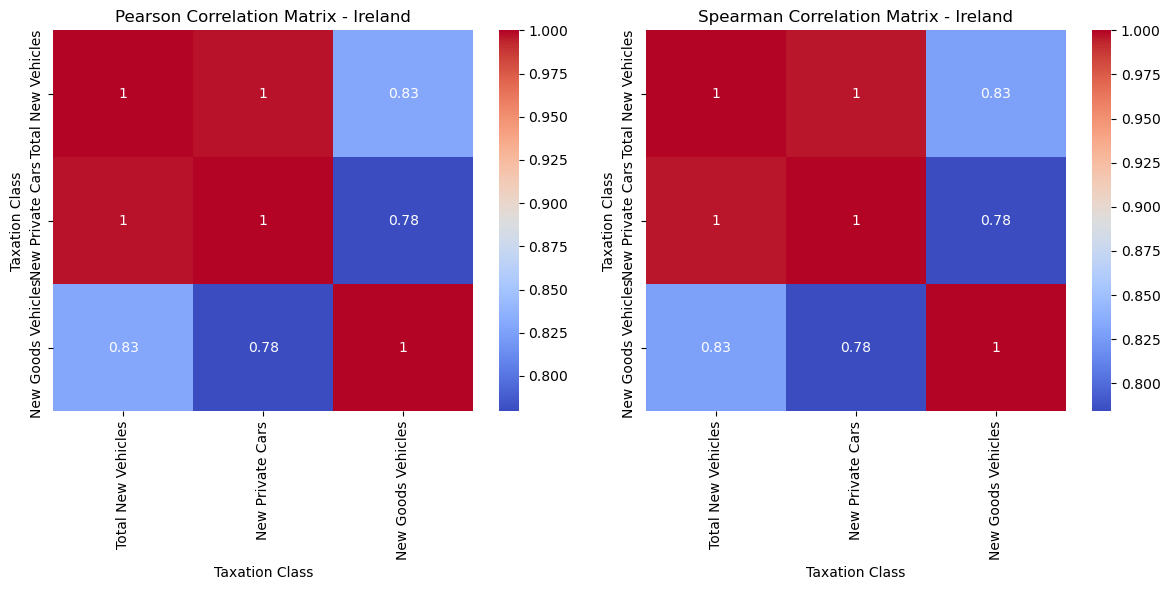

In [64]:
pearson_corr_ir = dfir[['Total New Vehicles', 'New Private Cars', 'New Goods Vehicles']].corr(method='pearson')
spearman_corr_ir = dfir[['Total New Vehicles', 'New Private Cars', 'New Goods Vehicles']].corr(method='spearman')

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.heatmap(pearson_corr_ir, annot=True, cmap='coolwarm')
plt.title('Pearson Correlation Matrix - Ireland')

plt.subplot(1, 2, 2)
sns.heatmap(spearman_corr_ir, annot=True, cmap='coolwarm')
plt.title('Spearman Correlation Matrix - Ireland')
plt.tight_layout()
plt.show()

Yüklediğiniz görselde Pearson ve Spearman korelasyon katsayıları için ısı haritası (heatmap) gösterilmektedir. 'Total New Vehicles' ve 'New Private Cars' arasındaki korelasyon katsayısının 1 olması, bu iki değişken arasında mükemmel bir doğrusal ilişki olduğunu gösterir. Yani, 'New Private Cars' değişkenindeki değişiklikler, 'Total New Vehicles' değişkenindeki değişiklikleri tam olarak yansıtıyor. Bu durum genellikle bir değişkenin diğer değişken tarafından tamamen açıklanabildiği veya veri setindeki bu iki sütunun aslında aynı bilgiyi içerdiği anlamına gelir. Bu, bir veri giriş hatası, veri işleme hatası veya bu iki değişkenin doğası gereği aynı değerleri içermesi gibi bir durumdan kaynaklanıyor olabilir.

Pearson ve Spearman korelasyon katsayılarının aynı değerleri göstermesi ise, veri setindeki ilişkinin hem doğrusal hem de monoton (sıralı) olduğunu gösterir. Yani, değişkenler arasındaki ilişki hem doğrusal hem de sıralama açısından tutarlıdır. Bu durum, özellikle değişkenler arasındaki ilişkinin hem doğrusal hem de sıralama bazında güçlü olduğu zamanlarda normaldir.

Ancak, 'Total New Vehicles' ve 'New Private Cars' arasındaki korelasyonun 1 olması beklenmedik bir durum olabilir ve bu, veri setinin daha detaylı incelenmesini gerektirebilir. Özellikle, bu iki sütunun aslında aynı verileri içerip içermediği veya bir hata sonucu aynı verilerin tekrarlanıp tekrarlanmadığı kontrol edilmelidir. Bu tür durumlar, veri toplama veya veri işleme aşamalarında meydana gelebilecek hatalardan kaynaklanabilir

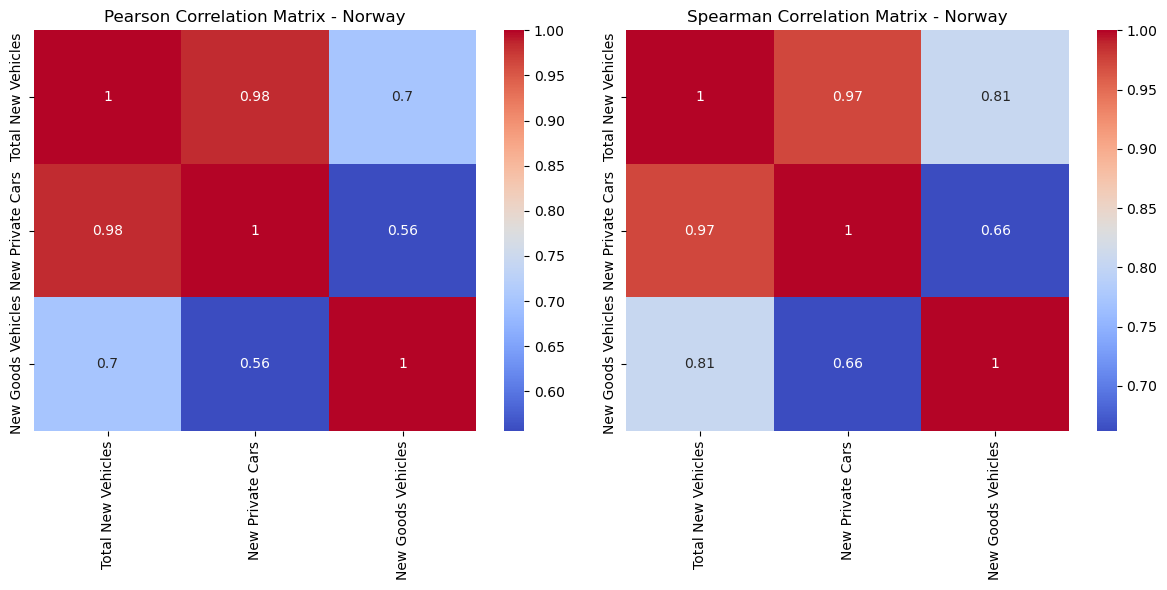

In [65]:
pearson_corr_nor = dfnor[['Total New Vehicles', 'New Private Cars', 'New Goods Vehicles']].corr(method='pearson')
spearman_corr_nor = dfnor[['Total New Vehicles', 'New Private Cars', 'New Goods Vehicles']].corr(method='spearman')

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.heatmap(pearson_corr_nor, annot=True, cmap='coolwarm')
plt.title('Pearson Correlation Matrix - Norway')

plt.subplot(1, 2, 2)
sns.heatmap(spearman_corr_nor, annot=True, cmap='coolwarm')
plt.title('Spearman Correlation Matrix - Norway')
plt.tight_layout()
plt.show()

## Machine Learning

In [66]:
dfir_copy = dfir.copy()
dfnor_copy = dfnor.copy()

dfir_copy['Year'] = dfir_copy['Month'] // 100
dfir_copy['Month'] = dfir_copy['Month'] % 100

dfnor_copy['Year'] = dfnor_copy['Month'] // 100
dfnor_copy['Month'] = dfnor_copy['Month'] % 100

dfir_copy.head()

Taxation Class,Month,New Private Cars,New Goods Vehicles,Total New Vehicles,Year
0,1,17192.0,2518.0,19710.0,1998
1,2,15480.0,2377.0,17857.0,1998
2,3,14703.0,2366.0,17069.0,1998
3,4,16903.0,2507.0,19410.0,1998
4,5,15921.0,2172.0,18093.0,1998


In [67]:
dfnor_copy.head()

,Month,New Private Cars,New Goods Vehicles,Total New Vehicles,Year
0,1,9639,2465,12104,1998
1,2,9687,2034,11721,1998
2,3,12913,2376,15289,1998
3,4,12349,2223,14572,1998
4,5,14269,2197,16466,1998


In [68]:
def create_lagged_features(df, n_lags):
    for lag in range(1, n_lags + 1):
        df[f'lag_{lag}'] = df['Total New Vehicles'].shift(lag)
    return df

dfir_total_vehicles = dfir_copy[['Year', 'Month', 'Total New Vehicles']].copy()
dfnor_total_vehicles = dfnor_copy[['Year', 'Month', 'Total New Vehicles']].copy()

n_lags = 18
dfir_lagged = create_lagged_features(dfir_total_vehicles, n_lags)
dfnor_lagged = create_lagged_features(dfnor_total_vehicles, n_lags)

dfir_lagged.head(40)

Taxation Class,Year,Month,Total New Vehicles,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,...,lag_9,lag_10,lag_11,lag_12,lag_13,lag_14,lag_15,lag_16,lag_17,lag_18
0,1998,1,19710.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1998,2,17857.0,19710.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1998,3,17069.0,17857.0,19710.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1998,4,19410.0,17069.0,17857.0,19710.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1998,5,18093.0,19410.0,17069.0,17857.0,19710.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1998,6,15463.0,18093.0,19410.0,17069.0,17857.0,19710.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1998,7,15790.0,15463.0,18093.0,19410.0,17069.0,17857.0,19710.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1998,8,10939.0,15790.0,15463.0,18093.0,19410.0,17069.0,17857.0,19710.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1998,9,8366.0,10939.0,15790.0,15463.0,18093.0,19410.0,17069.0,17857.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1998,10,8113.0,8366.0,10939.0,15790.0,15463.0,18093.0,19410.0,17069.0,...,19710.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

dfir_lagged_clean = dfir_lagged.dropna()

X_dfir = dfir_lagged_clean.drop(['Total New Vehicles'], axis=1)
y_dfir = dfir_lagged_clean['Total New Vehicles']

X_train_dfir, X_test_dfir, y_train_dfir, y_test_dfir = train_test_split(X_dfir, y_dfir, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_dfir, y_train_dfir)
best_params = grid_search.best_params_
y_pred_dfir = grid_search.predict(X_test_dfir)

mse = mean_squared_error(y_test_dfir, y_pred_dfir)
r2 = r2_score(y_test_dfir, y_pred_dfir)

(best_params, mse, r2)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


({'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200},
 6306494.259521238,
 0.9105962908810309)

In [70]:
rf_model_optimized = RandomForestRegressor(
    n_estimators=200,
    max_depth=10,
    min_samples_split=2,
    random_state=42
)

rf_model_optimized.fit(X_train_dfir, y_train_dfir)
y_pred_optimized = rf_model_optimized.predict(X_test_dfir)

mse_rfr = mean_squared_error(y_test_dfir, y_pred_optimized)
r2_rfr = r2_score(y_test_dfir, y_pred_optimized)
rmse_rfr = mean_squared_error(y_test_dfir, y_pred_optimized, squared=False)

(mse_rfr, r2_rfr, rmse_rfr)

(6306494.259521238, 0.9105962908810309, 2511.2734338421287)

In [71]:
from sklearn.model_selection import cross_val_score

cross_val_scores_rf = cross_val_score(rf_model_optimized, y_pred_optimized.reshape(-1, 1), y_test_dfir, cv=5)

print("Random Forest Cross-validation Scores:", cross_val_scores_rf)
print("Average Cross-validation Score:", np.mean(cross_val_scores_rf))

Random Forest Cross-validation Scores: [0.90444458 0.95022874 0.64920827 0.94478712 0.93360436]
Average Cross-validation Score: 0.8764546141563823


In [72]:
def predict_future_months(model, last_row, n_months):
    future_predictions = []
    new_row = last_row.copy()
    
    for _ in range(n_months):
        next_value = model.predict([new_row])
        future_predictions.append(next_value[0])

        new_row = np.roll(new_row, -1)
        new_row[-1] = next_value

    return future_predictions

last_row_dfir = X_train_dfir.iloc[-1].values

n_months_future = 60
future_predictions_dfir = predict_future_months(rf_model_optimized, last_row_dfir, n_months_future)

future_predictions_dfir[:12]

[33114.915,
 2909.440833333333,
 5619.343065723319,
 7882.753115497076,
 10514.086486119144,
 14937.38312170578,
 18852.643888569768,
 21083.0596499334,
 8904.909318181819,
 8949.215151515153,
 10073.790833333334,
 11250.458571131356]

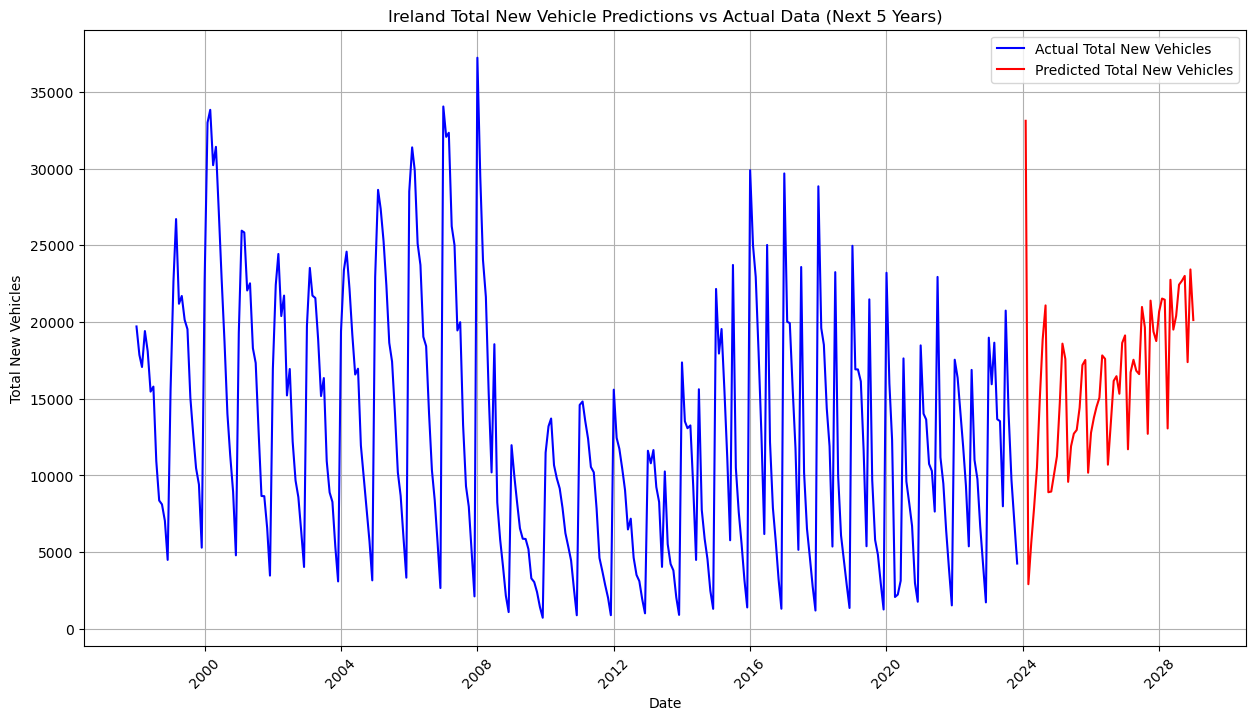

In [73]:
dfir_original = dfir_copy[['Year', 'Month', 'Total New Vehicles']]
dfir_original['Date'] = pd.to_datetime(dfir_original['Year'].astype(str) + dfir_original['Month'].astype(str), format='%Y%m')

future_months = pd.date_range(start='2024-01-01', periods=n_months_future, freq='M')
predictions_df = pd.DataFrame({
    'Date': future_months,
    'Predicted Total New Vehicles': future_predictions_dfir
})

plt.figure(figsize=(15, 8))

plt.plot(dfir_original['Date'], dfir_original['Total New Vehicles'], label='Actual Total New Vehicles', color='blue')

plt.plot(predictions_df['Date'], predictions_df['Predicted Total New Vehicles'], label='Predicted Total New Vehicles', color='red')

plt.title('Ireland Total New Vehicle Predictions vs Actual Data (Next 5 Years)')
plt.xlabel('Date')
plt.ylabel('Total New Vehicles')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

In [74]:
dfnor['Month'] = pd.to_datetime(dfnor['Month'], format='%Y%m')
dfnor['Year'] = dfnor['Month'].dt.year
dfnor['Month'] = dfnor['Month'].dt.month

dfnor.head()


,Month,New Private Cars,New Goods Vehicles,Total New Vehicles,Year
0,1,9639,2465,12104,1998
1,2,9687,2034,11721,1998
2,3,12913,2376,15289,1998
3,4,12349,2223,14572,1998
4,5,14269,2197,16466,1998


In [75]:
from sklearn.ensemble import GradientBoostingRegressor

X = dfnor[['Year', 'Month']]
y = dfnor['Total New Vehicles']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
gbr = GradientBoostingRegressor(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

best_gbr = grid_search.best_estimator_

y_pred = best_gbr.predict(X_test)

mse_gbr = mean_squared_error(y_test, y_pred)
r2_gbr = r2_score(y_test, y_pred)
rmse_gbr = mean_squared_error(y_test, y_pred, squared=False)

best_params, mse_gbr, r2_gbr, rmse_gbr

Fitting 5 folds for each of 27 candidates, totalling 135 fits


({'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 200},
 6068495.095247943,
 0.6756507606274568,
 2463.4315690207313)

In [76]:
cross_val_scores_gbr = cross_val_score(best_gbr, y_pred.reshape(-1, 1), y_test, cv=5)

print("Gradient Boosting Regressor Cross-validation Scores:", cross_val_scores_gbr)
print("Average Cross-validation Score:", np.mean(cross_val_scores_gbr))

Gradient Boosting Regressor Cross-validation Scores: [ 0.71112036  0.78506955 -0.1287796   0.23782975  0.61089052]
Average Cross-validation Score: 0.44322611694170877


In [77]:
current_year = dfnor['Year'].max()
future_years1 = np.arange(current_year + 1, current_year + 6)
months = np.arange(1, 13)

future_data1 = [(year, month) for year in future_years1 for month in months]
future_df1 = pd.DataFrame(future_data1, columns=['Year', 'Month'])

future_predictions1 = best_gbr.predict(future_df1)

future_df1['Predicted Total New Vehicles'] = future_predictions1
future_df1.head(10), future_df1.tail(10) 

(   Year  Month  Predicted Total New Vehicles
 0  2024      1                   3267.510142
 1  2024      2                   9888.290566
 2  2024      3                  22762.704743
 3  2024      4                  15607.828090
 4  2024      5                  16088.313863
 5  2024      6                  19403.290045
 6  2024      7                   9211.911545
 7  2024      8                  14884.311481
 8  2024      9                  15236.419114
 9  2024     10                  11978.851369,
     Year  Month  Predicted Total New Vehicles
 50  2028      3                  22762.704743
 51  2028      4                  15607.828090
 52  2028      5                  16088.313863
 53  2028      6                  19403.290045
 54  2028      7                   9211.911545
 55  2028      8                  14884.311481
 56  2028      9                  15236.419114
 57  2028     10                  11978.851369
 58  2028     11                  13780.386722
 59  2028     12       

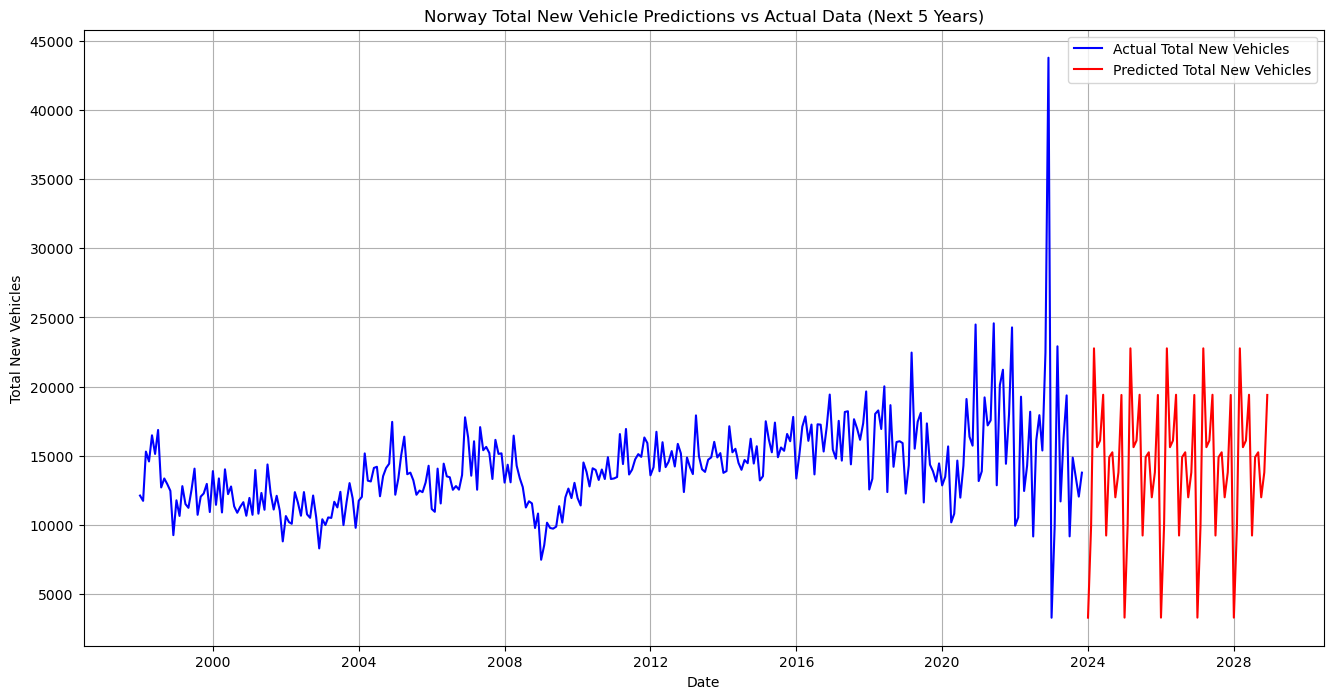

In [78]:
dfnor['Date'] = pd.to_datetime(dfnor['Year'].astype(str) + dfnor['Month'].astype(str), format='%Y%m')
future_df1['Date'] = pd.to_datetime(future_df1['Year'].astype(str) + future_df1['Month'].astype(str), format='%Y%m')

plt.figure(figsize=(16, 8))

plt.plot(dfnor['Date'], dfnor['Total New Vehicles'], label='Actual Total New Vehicles', color='blue')

plt.plot(future_df1['Date'], future_df1['Predicted Total New Vehicles'], label='Predicted Total New Vehicles', color='red')

plt.title('Norway Total New Vehicle Predictions vs Actual Data (Next 5 Years)')
plt.xlabel('Date')
plt.ylabel('Total New Vehicles')
plt.legend()
plt.grid(True)
plt.show()

In [79]:
print(f'Mean Squared Error Random Forest: {mse_rfr}, Gradient Boosting Regressor: {mse_gbr}')
print(f'Root Mean Squared Error Random Forest: {rmse_rfr}, Gradient Boosting Regressor: {rmse_gbr}')
print(f'R^2 Score Random Forest: {r2_rfr}, Gradient Boosting Regressor: {r2_gbr}')
print(f'Cross-validation Scores Random Forest: {cross_val_scores_gbr}, Gradient Boosting Regressor: {cross_val_scores_rf}')
print(f'Average Cross-validation Score Random Forest: {np.mean(cross_val_scores_gbr)}, Gradient Boosting Regressor: {np.mean(cross_val_scores_rf)}')

Mean Squared Error Random Forest: 6306494.259521238, Gradient Boosting Regressor: 6068495.095247943
Root Mean Squared Error Random Forest: 2511.2734338421287, Gradient Boosting Regressor: 2463.4315690207313
R^2 Score Random Forest: 0.9105962908810309, Gradient Boosting Regressor: 0.6756507606274568
Cross-validation Scores Random Forest: [ 0.71112036  0.78506955 -0.1287796   0.23782975  0.61089052], Gradient Boosting Regressor: [0.90444458 0.95022874 0.64920827 0.94478712 0.93360436]
Average Cross-validation Score Random Forest: 0.44322611694170877, Gradient Boosting Regressor: 0.8764546141563823


In [80]:
scores_table = pd.DataFrame({
    'Metric': ['Mean Squared Error', 'Root Mean Squared Error', 'R² Score', 'Average Cross-validation Score'],
    'Random Forest': [mse_rfr, rmse_rfr, r2_rfr, np.mean(cross_val_scores_rf)],
    'Gradient Boosting': [mse_gbr, rmse_gbr, r2_gbr, np.mean(cross_val_scores_gbr)]
})

scores_table

,Metric,Random Forest,Gradient Boosting
0,Mean Squared Error,6.306494e+06,6.068495e+06
1,Root Mean Squared Error,2.511273e+03,2.463432e+03
2,R² Score,9.105963e-01,6.756508e-01
3,Average Cross-validation Score,8.764546e-01,4.432261e-01


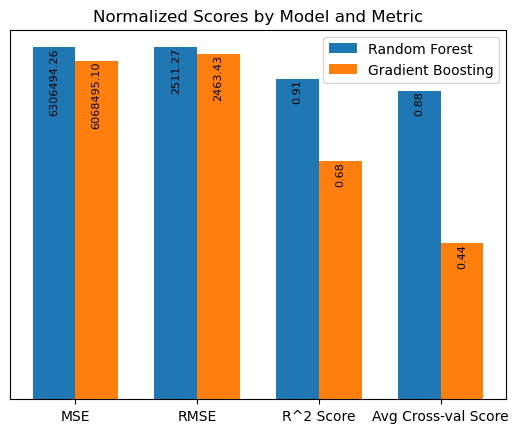

In [81]:
avg_cross_val_rf = np.mean(cross_val_scores_rf)
avg_cross_val_gbr = np.mean(cross_val_scores_gbr)

max_mse = max(mse_rfr, mse_gbr)
max_rmse = max(rmse_rfr, rmse_gbr)

normalized_mse_rfr = mse_rfr / max_mse
normalized_mse_gbr = mse_gbr / max_mse
normalized_rmse_rfr = rmse_rfr / max_rmse
normalized_rmse_gbr = rmse_gbr / max_rmse

rf_scores_normalized = [normalized_mse_rfr, normalized_rmse_rfr, r2_rfr, avg_cross_val_rf]
gbr_scores_normalized = [normalized_mse_gbr, normalized_rmse_gbr, r2_gbr, avg_cross_val_gbr]

rf_scores = [mse_rfr, rmse_rfr, r2_rfr, avg_cross_val_rf]
gbr_scores = [mse_gbr, rmse_gbr, r2_gbr, avg_cross_val_gbr]

fig, ax = plt.subplots()
labels = ['MSE', 'RMSE', 'R^2 Score', 'Avg Cross-val Score']
x = np.arange(len(labels))
width = 0.35

bars1 = ax.bar(x - width/2, rf_scores_normalized, width, label='Random Forest')
bars2 = ax.bar(x + width/2, gbr_scores_normalized, width, label='Gradient Boosting')

def add_horizontal_labels(bars, actual_values):
    for bar, value in zip(bars, actual_values):
        label_x_pos = bar.get_x() + bar.get_width() / 2
        ax.text(label_x_pos, bar.get_height(), f'{value:.2f}',
                ha='center', va='top', color='black', fontsize=8, rotation='vertical')

add_horizontal_labels(bars1, rf_scores)
add_horizontal_labels(bars2, gbr_scores)

ax.set_ylabel('Normalized Scores')
ax.set_title('Normalized Scores by Model and Metric')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.yaxis.set_visible(False)

plt.show()


In [82]:
import praw

reddit = praw.Reddit(
    client_id='V11tctlwCx3EOYQDbXjrvQ',         
    client_secret='hLXfkcsBzrHEhX_w9U5wMneYHYeWUA', 
    user_agent='new car'          
)

submission_id = '12qentf'  
submission = reddit.submission(id=submission_id)

submission.comments.replace_more(limit=0)
for comment in submission.comments.list():
    print(comment.body) 

The new taxes will be ring fenced to fund public transport projects, right?
Had to get the bus to the airport a while ago in the dead of night. Since they only went every few hours I had to get it way ahead of the time I needed, which turned out handy since I got to watch the bus sit in the local petrol station for 30 minutes past its due time on the live tracker. And I wasn't too badly off, since the girl waiting with me on the road alone in the dark had been there for the previous one, and it hadn't come at all.

We do not have a functional public transport alternative in this country, and the problem isn't traffic. These aren't problems we can fine or tax our way out of, so this stuff cannot serve its stated purpose.
More stick.
[deleted]
Wonder when we can get decent public transport. I start work at 5.45 and there's no bus to my job. This in Waterford City, not the backarse of nowhere. Having buses that are on time and some notification if a buses won't show up is a problem.
At th

In [83]:
print(type(comment.body))

<class 'str'>


In [84]:
separator = '\n\n'

comment_body = '''The new taxes will be ring fenced to fund public transport projects, right?
Had to get the bus to the airport a while ago in the dead of night. Since they only went every few hours I had to get it way ahead of the time I needed, which turned out handy since I got to watch the bus sit in the local petrol station for 30 minutes past its due time on the live tracker. And I wasn't too badly off, since the girl waiting with me on the road alone in the dark had been there for the previous one, and it hadn't come at all.

We do not have a functional public transport alternative in this country, and the problem isn't traffic. These aren't problems we can fine or tax our way out of, so this stuff cannot serve its stated purpose.
More stick.
[deleted]
Wonder when we can get decent public transport. I start work at 5.45 and there's no bus to my job. This in Waterford City, not the backarse of nowhere. Having buses that are on time and some notification if a buses won't show up is a problem.
At the moment public transport is overpriced, unreliable and inconsistent. Until that changes I'll be driving my car for my 40 minute drive instead of a 2 hour public transport option
TFI cut a bus and a train service from Carlow to Dublin that I used several times a week. It was always packed. When I queried them about it, they said there was plenty of private services offering that route. The private services are longer, more expensive and less frequent. There's a 3 hour gap in services leaving Carlow to Dublin now daily. I have had no choice but to return to driving my car for those trips.

TFI dont care about public transport. They are trying to privatise public transfer, move it into private companies that they don't have to manage, and then still recoup tax increases like this? Its absolute madness.
How about they get fucked with bringing in new taxes for the moment?

Tax revenue is running at a massively unexpected surplus yet peoples cost of living is huge with disposable income in the gutter.

Improve alternate and reliable systems of transport BEFORE you implement restrictions or additional costs on the modes of transport that people currently rely on.

Stop being a prick Eamonn. We get the green adjenda and all, but you seem to be going out of your way to actively damage the average person  in Ireland's life for the sake of a carbon quota that the nation won't reach anyway. 

How about you put some of that energy into regulating that every single new build of house & apartment must incorporate solar? 

Fucking twat.
Sucks that public transport is so bad here in some places.

Are they taxing private jets heavily as well or are they still talking about it ?  


Or was it an outright ban in Irish air space ?
This isn't plastic bags all over again. People drive because they have to. We see massive fluctuations in fuel prices, and steady rises in the price of cars and insurance and still people drive. Provide a public transport service that competes on speed and convenience and then you'll see some changes.
Waiting for all the urban dwelling, working from home, college educated bourgeoisie to tell me how this is a great idea. Somehow in their head they’ll find a way to justify Punitive taxes that disproportionately hit the working poor and the rural poor. Cunts.
I don't have a car, but this is ridiculous. Just last night from 21:35 to 22:15 I stood at a bus stop in Drimnagh and none of the buses that were on the monitor or in the app ever showed up. I ended up having to take a taxi. Provide barebones public transport before you start reducing car usage...
This worked already. I'll never be able to afford a car in my life. Well I could if insurance wasn't an issue.
Does that mean we can have trains in Donegal and actual local busses? 

Its jokes when I have friends visit from Dublin and ask are we getting the bus somewhere.........

  
WHAT BUS
Can't wait for these taxes to hit rural areas, where they have no alternative but to use their cars.

Surely this will help the green movement going forward, and won't result in a huge backlash against the greens?
Could anything be said for another round of work from home.
" aims to reduce congestion in towns and cities, improve air quality, and provide more and safer space for public transport, walking, and cycling. "  


Have to ask why do we have congestion? Because people need to travel through those towns to get somewhere.   


Solution is better transport infrastructure- underground in cities. Bypass for towns (a lot have already).  


More taxation does not solve these problems. It may provide funding eventually for this. But immediate cut of infrastructure (reduce road space for vehicles) on the future promise of infrastructure is not the way to go. Build the infrastructure first and people will change habits later (by persuasion, coercion or prohibtion)
The beatings will continue..
Is there anything to be said for another tax?
&#x200B;

https://preview.redd.it/jow2nxbcypua1.jpeg?width=500&format=pjpg&auto=webp&s=c164b877df4cce257bbe682f692d5b862e4cc0fa
These people are fucking mental, provide the public transport first
Offer little to no viable public transport outside of Dublin. Then try to 'reduce car usage', Can't wait to elect these cunts out to fuck.
Oh.. A tax? What a wild new way of looking at things.

That's why I love our government - always re-inventing themselves with shocking brilliance. Never afraid to try a different approach and trailblaze a new path for a better future.
Climate change! The gift that keeps on giving!

&#x200B;

They'll suck every last hydrogen atom out of that ball! Eamon is sucking much of the helium already.
Oh, yay.......
Eamon could review the  Super Mario movie and it would include a paragraph about reducing car usage.
It's like the government taking a shit on your head and then asking do you like your new hat?
I'm sure this genius strategy will fix it right up.
Everyone seems to be moaning about funding

It has actually been massively increased particularly in last years budget 

https://www.gov.ie/en/press-release/9d6ba-budget-2023-continues-to-keep-costs-down-for-commuters-and-ensures-that-transport-developments-can-continue-at-pace/
How about we impose taxes on Eamon Ryan.. the emissions from his mouth probably rival the gasses produced from the entire agricultural sector
[deleted]
Genius idea.  Let’s tax cars.  Amazing no one has ever come up with that idea before.
Now remember he said "more space" for public transport not "more public transport"
Be great if they could do something besides think of ways to milk taxpayers.
ITT - 

1. people working themselves into a lather on the chance to vote Ryan out

1. same people bitching about lack of public transport, while ignoring the lack of PT funding or malicious meddling by FF for close to 50 years.
Sounds good 👍

"New taxes are expected to form part of a strategy to reduce car usage being developed by Green Party leader Eamon Ryan.

 new national demand management strategy which aims to reduce congestion in towns and cities, improve air quality, and provide more and safer space for public transport, walking, and cycling.


A source said Mr Ryan’s focus is on ensuring greater access to public transport before any measures such as congestion charges are examined."
People talking about helping the enviroment 😊

People when helping the enviroment might possibly change anything about how they live in even the slightest way 😡😡😡😡😡😡😡😡😡
Some say Eamonn Ryan likes cow farts! That's what the cows have been saying!
Maybe they got sick of the fruit loops cunts protesting cycle lanes.
Hurray more taxes
Cost of living crisis and people having to travel further for work as no housing near their work and what do the Green Party want? More fucking taxes.
Have FG/FF ever faced a problem that the solution wasn't "We'll have to make a new tax".

Fuckers putting us off the goddam roads without providing a single goddam solution. 

If you don't live in a city just get used to sitting in your house in the dark. Cunts.
Any part of that strategy aimed at providing any other option or is it just ever more tax for the tax god?
But no info on what the taxes are...
Think how much healthier people will be having to walk to the market each day because they can buy only 2 bags of groceries, plus the womenfolk won’t be able to load the 4 children up in the car to do anything
>A source said Mr Ryan’s focus is on ensuring greater access to public transport before any measures such as congestion charges are examined.

>The strategy, once completed, will propose legislation and potential new taxes aimed at reducing car usage in the future.

Ridiculous headline from the Examiner. Ryan has consistently said that he's not considering congestion charges until public transport provision is improved.
You'll take your Victorian hand me down rail network and you'll like it.
Oh sure, absolutely. Those projects are just around the corner.
Public transport funding has already been massively increased.
Fuel excise duties have been cut, while the government has cut public transport fares while sinking more money into low-use rural and town buses, plus of course the Metro is going to cost probably a 10-figure sum.
Tbf the article does say Eamon Ryan aims to improve public transport first and then introduce the taxes
~ Annakin Skywalker meme intensifies ~
They'll be used to fund councils outbidding first-time buyers, as nature intended.
That's not how taxes work, we don't ring fence new taxes directly for anything
Absolutely, we’ll definitely add more to Dublin.. sometime.
Honestly, even if they explicitly said it would be ‘ring fenced’ for some purpose, it seems like the execution of that concept in recent years has been very all over the place
It'll be used to buy Leo some new socks for his next trip away.
Will they fuck. We will get another stupid spike and half a new hospital. The rest will go missing under totally not suspicious circumstances.
He says the taxes would be implemented after public transport is improved.
Read the article. Headline is nonsense.
My current car commute is 8 minutes v 80 minutes using public transport or 150 minute walk each way.

So 80 minutes a week v 800 minutes? 

I live in Dublin - god speed if you live rural.

I'm voting SF next time just to ensure the Greens are gone.
I know a few people from waterford and they say they would be hard pressed to call it a town nevermind a city 😅

Jokes aside if youre going to introduce taxes like this you should be exempt if you can prove you don't have access to public transport when you need it for work
Sorry but in Dublin its not overpriced. 2 euro every 90 minutes on a leap card is great.
He does say in the article that he aims to improve the public transport before introducing the new taxes.
He is a prick though, can't wait to get him out.
That man - I actually can't deal. 

I'd almost welcome another recession if it destroyed the green party.  

Every political party has a green agenda? Does that not make them redundant? That and they're actual twats.
So glad someone on here has the same opinion. Completely nonsensical. We'll soon be taxed for using the footpaths in ireland as walking won't bring in any tax revenue, apart from the vat paid on your shoes.

The Green Party make me want to leave Ireland to be honest.

Everything is oh We'll tax the little guy.
Fuck private jets. They should be banned.
Apples and oranges. 

Also a ban only works if it's EU wide, otherwise they will just fly around, making them even worse for the environment 

I agree with the ban, but us doing it alone is nothing more then political signalling that achieves nothing
A source said Mr Ryan's focus is on ensuring greater access to public transport before any measures such as congestion charges are examined."
It's not even close to plastic bag tax. At least when I'm shopping I have a realistic alternative to carrying my shit. I simply cannot walk to work. Last time I had to take a bus for work I was fired for being constantly late.
"strategy which aims to reduce congestion in towns and cities,"
>Solution is better transport infrastructure- underground in cities. Bypass for towns (a lot have already).

Lol no, public transport is the solution, a vastly improved rail network along with segregated cycle lanes and decent walking plus bus lanes that are actually kept completely empty of non public transport traffic.
It's not, most congestion is people within towns going other places in town. Majority of car journeys in Ireland are under 5k.
> Because people need to travel through those towns to get somewhere.

1. The huge number of bypasses and major N/M routes belie that

1. how many of these people live in one off housing in the countryside and are *not* farmers?
Increasing the budget is meaningless without a massively improved service. 

Just look at the HSE, record budgets every year but the service very rarely improves.
How many carriages?
Rich mans delight tax . While he saunters into work on traffic free roads and doesn’t give a fuck how much they charge the rest of us are  forced onto the bus
I think people would be happy with this provided the infrastructure is set up to do it. 

It says in the article it wont be done until public transport is up to snuff but how long will that take
We've been waiting for our victorian hand me down rail in Navan for years.
Donegal would love to have the Victorian railways back. Or even not have to use cars all the time.
[deleted]
To be fair nearly all countries are largely dependant on 19th century railway networks. Railway building since WW1 has been largely restricted to cities or between cities.
To be fair nearly all countries are largely dependant on 19th century railway networks. Railway building since WW1 has been largely restricted to cities or between cities.
If only the Victorians built more stuff in Ireland. Or we kept what they built.
So let's keep increasing it. The public transport network is still fucking shocking.
Bus services are worse than precovid in my area.
I am excited for those new DART trains.
What are they spending it on? Their wages?
Except for on the expressway services where they're actually necessary for commuters.
Not hard to massive increase something if you're increasing it from almost nothing...
That's massive!
The Metro isn’t going to happen. It’s just dangled in front of Northsiders periodically to tease them
All great, if you live within about 20km of the Dublin city centre...
Aims to improve public transport first before taxing ……. Forgive me if I seem dubious but politicians have made me this way
We have the facility to do so and, well, [you know... ](https://www.irishexaminer.com/news/politics/arid-41098471.html)
[deleted]
So about 9 miles ? Sounds perfect for a cycle.
Waterford definitely feels more like a town, but rapidly expanding.
Yea, but then they'll just pull the "well theres a station within x amount of distance so you're not exempt" nevermind the fact the station has like 20 parking spaces and is half an hour by bike from where i am..
And what about everyone else that isn't on Dublin transport?
Dublin accounts for about a quarter of the population. Most of the rest of us have no viable public transport.
Yes, Dublin only. It might be hard for you to believe, but there are other counties & towns outside of Dalkey
Well then I think he may have spelled "Guarantee" incorrectly.
No other parties are going far enough.
This is the green party. We know their form.
Eh rural Ireland is full of towns. 

How do you get to them. And get around them?

It's just another attack on cars by the greens.
They'll add more local link buses that take hours to go short journeys to the middle of nowhere. We need cheap and reliable public transport to the cities, however they've privatized those routes.
As well as a full metro system in Dublin, and comprehensive tram networks in the other cities.
all you have said is better transport infrastructure. so are you for or against better transport infrastructure?
Traffic free roads. Sounds great 👍. Busses are the best for city transport.
> I think people would be happy with this provided the infrastructure is set up to do it. 

I disagree. I know lots of people that could take public transport or even walk to their jobs right now with the level of infrastructure we already have. They choose not to because driving is more convenient.

I know multiple people who have bus stops within a 5 minute walk of thier house. Two who literally have bus stops outside their houses. These buses will all take them withing a few minutes walk get them where they want to go. They still don't do it.

You have to do something to get people out of cars. Using only incentives is not enough.
So are you for or against this move ? Are the greens  moving fast enough?

*Edit
Navan is the Congo of Ireland. They only built the rail to take what they could out of it.
Rail Feda when?
It was more extensive that's for sure, particularly towards the end of that era. However, *better* is one of those words that people will use broadly but have a very specific definition for. 

So when you say better, better in what way?

For example it took about 7 hours to get from Dublin to Cork by rail back then. A significant improvement over using the roads, but it only takes 2hr 40m now.
They can't find drivers at the minute. Big recruitment drive in at the minute
https://www.gov.ie/en/press-release/9d6ba-budget-2023-continues-to-keep-costs-down-for-commuters-and-ensures-that-transport-developments-can-continue-at-pace/
Public transport is almost non existent is it?
Even if it does happen it's nowhere close to enough.
Cork is getting big improvements to frequency on its commuter line.
We've a long way to go, but the 2 quid 90 minute journey is class value. Credit where credit is due.
Sounds about right and I won't be doing it 6am so I can spend 9 hours on my feet to do again.
Bikes are a faster alternative to walking. They are not a replacement for frequent public transport, and you know that!
Cycling isn't a substitute for public transport.
> is half an hour by bike from where i am..

20 km/h is a very reasonable speed to do on bike. You live 10 km away from the station which is quite far.
Can't comment on the cost anywhere else as i only get the bus in Dublin but im guessing the bus prices within limerick, galway and cork are going to be similarly priced.
Most of Dublin doesn't even have that.
Most of the rest of you live in rural areas
Well done, thats why i specificied Dublin. If i was forgetting about other places why would i mention Dublin?
Where in the article does it say “guarantee” anywhere? You’ve manifested a situation that does not exist, and then became outraged over it, directing abuse at a man who you do not know nor care to actually listen to what he is suggesting. 

Go outside and interact with real people and live your life
No party is going far enough. If they were there would be plans for a hell of a lot more than half a metro line in Dublin...
[deleted]
Yep, pushing through unpopular but needed legislation.

They aren't going to put a congestion charge going into Skibbereen.
I live in a rural regional town in a large estate about a 15 min walk from the Main St. We never use our car, but we are often the only people walking in and out to town with the traffic mental. People refuse to walk. There is a massive issue with laziness.
I'd love to see Ryan move to the northwest corner of Donegal and trial some of his own ridiculous ideas, then get back to us with his plans.
Ideally, Ireland should be building sustainable small towns and reducing out of town housing which inevitably requires cars and car-based infrastructure to support those lifestyles. 

Obviously that is a BIG jump , but by doing this , the ecology of Ireland can be a restored, and infrastructure for public transport can be more focused. Supermarkets and shopping centres would need less car parks (if at all), and people in town could stop parking on the footpaths.
Get to them bus, get around the bike or ebike
Who privatized them?
Your phrasing gives the impression you think the solution is car centric, cars use needs to be discouraged, primarily by having a public transport system that's a lot better and a lot cheaper. Building infrastructure for cars is the last thing we should be doing.
Trains and trams are the best*
Indeed and they are but a two tiered system isn’t
How frequent are those buses.
Having a bus stop near your house doesn't mean it's a better alternative, if it takes you 30 minutes by bus or 5 min by car of course people will choose the car.
My complaint would be if they introduce this before public transport is reliable and frequent then they've just hit us with another tax, and Ryan would have told an old fib about waiting. 

Our public transport roll out has been glacier paced, but thats not just down to the greens, its all of the government and their agencies faults.
Fucking heart of darkness all over again.
Who'd be the Kony of Navan so?
Ha ha ha. They could sponsor a coach each. 
Coach feda 
Dohertys coach
Etc etc
[deleted]
I think it was more like 4 hours. And there was a record run that did it in 2 1/2 hours.
Until they offer better wages there will always be a big recruitment drive. 

There's not enough drivers or mechanics for the current routes, so any new routes introduced will just reduce the service across all bus services till they start paying enough.
How are you even asking that question? Do you live in another country?
It just seems like that because it used to be a complete ripoff.
Why not ? Ebike, easy peasy .
They are an alternative to public transport in some situations
Tell that to everyone who commutes by bike.
Guessing with a nonchalance about you fit for a wee prince
Ah yes, super rural Cork. With its expensive, unreliable, old and frankly dirty bus service. Second city of Ireland, or "culchieland" to some elements on Reddit.
> Where in the article does it say “guarantee” anywhere?

That's the point. He says "Aims to improve" and as far as I'm concerned, that isn't good enough. The service needs to be in place and operational before any changes are made.

>You’ve manifested a situation that does not exist, and then became outraged over it, directing abuse at a man who you do not know nor care to actually listen to what he is suggesting.

No. I reacted to the direct statement made by Ryan and reported in this article. 

I strongly disagree that more controls or taxes or restrictions on motorists are either required or justifiable. 
The governmental goal of punishing car owners and restricting their operation and use has been clear for years. No issue there. It's a decision they made to try and make Ireland better and greener. 
The problem is that it isn't having the effect they want. Despite the massive cost, people are still choosing to use their cars
> He has made any environmental policy untouchable and detested by the public. 

The Greens are the only ones that are actually serious about implementing sustainable policies rather than just paying them lip service. People resent them for actually doing something. Almost everyone claims to want something to be done about climate change, but will have a fit when it affects them. Tackling climate change is something that should be done by other people, apparently.
It doesn't say that.
"new national demand management strategy which aims to reduce congestion in towns and cities"
>5 years ago every party had some green policies. Now they won't touch them.

What the fuck are you on about? 

Out of the last 6 publications on Sinn Féin's website, 3 are fully environmentally focused.

Fianna Fáil and Fine Gael have it as the third chapter in their combined manifesto 

Climate is one of Labour's four current policy headlines on their website 

PBP are totally insane and include such gems as saying they would nationalise large agricultural companies, but environment features in many forms (energy, housing, agriculture, environment and transport all talk about it in a primary sense, but it crops up elsewhere too) throughout their inconsistent and rambling policies.

Anyway, point is, you're talking shite.
Is that another way of saying a poor tax that won’t help to curb emissions?
Wait until you realise how many people from rural areas drive to Dublin for work
The government. That's the whole reason they separated out Bus Éireann (which is run at a loss) to it's Expressway services which are run at a profit. I'd imagine they didn't want to upset the likes of Wexford Bus or JJ Kavanaghs.
not sure how you see it as car centric comment.  

&#x200B;

"underground in cities" - thats not car centric. thats public transport unless you are suggesting we dig roadways & tunnels through the towns and cities?
Debatable, they are less flexible
Bicycles are the best in the majority of cases
Where is the two tiered system?
Every 30 minutes. Hardly matters IMO. Everywhere they are going is within a ~20 minute cycle. Everyones focus is dead set on public transport when oftentimes active transport is perfectly fine.
I agree that the greens need to move more aggressively with public transport but you know that you need a stick as well as a carrot to change behavior.
Lots of those old lines were built to a poor standard. If we did still have that old network I think it would be probably just be like Limerick to Ballybrophy x50. Not enough population for enough demand, and not enough demand to improve it to a modern standard that could compete with the alternatives.
I have spent the entirety of my adult life without a car, relying almost solely on public transport at all times, and I have not perished.
He's not wrong
Hardly - it is good value regardless. Getting from Malahide to Naas, for example, for 2 quid is very reasonable. 

Is it that hard for people to accept something is positive? Negativity like that drives me up the wall.
Never thought of that. Problem solved. 

Thank you
Enjoy your ebike on my road.. about 8-9km to town, on a road that is like Baghdad during the war with all the potholes, and gets nasty enough in the winter you need 4WD. If it snows here, only people with jeeps etc can make it up parts of it. Sure, cycling is great and all but our roads are an absolute joke
Not 9 fucking miles!
There"s a very big difference between making cycling a good option, and making it the only option. We need exponential improvements to public transport too.
I'm not against cycling, but what I'm saying is that the Government's public transport policy can't be "Cycle to work folks".
Not everyone is able to cycle. Ireland is a fucking kip for people with disabilities unless they are lucky enough to have the funds and ability to drive.
Not a notion what that means tbh
I wasn't aware Cork was home to the greater part of 3.5 million people but OK.
No
That's a large part of the problem.
The government didn't separate Bus Eireann and Expressways, BE did it themselves, they thought they could do a better job without government interference.
Was if FF or FG ?
I'm clearly not suggesting that, by underground do you mean a subway? Because that's a good idea. It's not clear to me when you say it in the same sentence as bypass which is a car centric road option.
Good. That means you can't axe a service anywhere near as easily
They're great, but they should never be the only option.
Are you 5? The one mr Ryan is trying to implement. by charging a tax you make something out of reach for poorer people and easier for rich people to get goods and services. I’m just going to assume you’re some sort of troll
>Every 30 minutes.

Which is nowhere _close_ to frequent enough. It's actually pathetic.

>Hardly matters IMO. Everywhere they are going is within a ~20 minute cycle. Everyones focus is dead set on public transport when oftentimes active transport is perfectly fine.

Let's be absolutely clear, active transport is great, but it is NOT an alternative to providing frequent and reliable public transport. Even the likes of Amsterdam and Copenhagen know that!
If you do insist on using a stick, it should be one that makes sense. It's much more effective to change the layout of streets than to just charge people to drive on them and still have them taking up every lane.
Congrats, but a lot of people works hours outside of public transport timetable.
I don't know if you're being sarcastic, but he's absolutely right, modern e-bikes are basically mopeds that through a (hopefully permanent) legal loophole don't require tax, insurance or a license. My one can pretty much do 25-30kmph on a flat road without any pedalling needed from me, and it cost me less than the cheapest 50cc scrambler.
Np. It's also good for your health 😊
The only time you need 4wd is when your boreen gets snowed under. And that's a week a year at most.
14 kilometres is not uncyclable, (I have done it before) especially if one is fit and healthy. And with an e-bike it becomes much easier.
That's about 25 mins
We do
The amount of people saying bike infrastructure on its own is good enough is honestly worrying. Even in cities where bikes are seen as the default mode, public transport is also great.
Absolutely, the disabled should have priority.
When I said "second city" I didn't mean "of only 2 cities in all of Ireland". Words, they're confusing I know.
Yes it's a large part of the problem that people have to work.
yes by underground i mean a subway.

&#x200B;

But for smaller towns thats not economically viable, so bypass would work better.   


these options are not mutually exclusive, and like it or not, cars are part of the solution for transport. as is public transport, and good old fashioned walking & cycling.
True
That's fair
Cars are already out of reach for the poor or is a huge financial burden. Better public transport will directly benefit the poor. 

The rich already use their assets to avoid any inconveniences, if you have a better idea than squeezing more money out of them I'm all ears.
You can just concentrate the financial pain on those with larger than average vehicles too.
How frequent is frequent enough then?

It could be every 2 minutes. They still ain't gonna use it because a car is more convenient.

> Let's be absolutely clear, active transport is great, but it is NOT an alternative to providing frequent and reliable public transport. Even the likes of Amsterfam and Copenhagen know that!

It absolutely is and using Amsterdam as an example is not helping you. In Amsterdam more people cycle to work than take the bus, tram, metro and train combined. And that's not even counting e-bikes. [Link](https://www.statista.com/statistics/1013713/mode-of-transport-used-to-commute-to-work-in-the-netherlands/). 

Most people live in towns. Most of the people living in those towns are working in those towns. All of the people living and working in those towns *could* walk or cycle if they felt like it. They choose not to. Even if we had the excellent public transport system that Amsterdam has most would still choose to drive just like the people in Amsterdam are currently choosing to do.

If you live in Dublin and own a car you own a car because you are fucking lazy and cars are super convenient. You aren't some super oppressed victim who would definately start using public transportation if only they did *x* thing. Once they do *x* it'll be *y*. Once they do *y* it'll be *z*. There'll always be some excuse to not use the existing public transport system.
Why not both?
If you dont have insurance what happens when you absolutely mangle someone at 30kmph?
Double win 🥳
If it was only a week per year, you still get to enjoy the flooded spots, potholes, and all-around general shit conditions.. our nephew used to stay with us and bike to work. However, stopped and got dropped in after the second accident unless it was good days.. you cant expect people to use bikes unless the infrastructure is there and the conditions are up to scratch.
There's an enormous difference between a distance that can be walked or cycled, and a distance where walking or cycling should be the only option.
Which is a very long journey not to have public transport as a viable option.
You could be a Tour de France cyclist but if you don't have a shower at work you won't cycle to work. Or if you have a disability, or if everything is frozen, or if it rains...
Well when you said "the rest of us" initially, how I was I supposed to know you you meant Cork? Perhaps, if you were specific in the first place you wouldn't have gotten such a reply.

And, yes I agree that Cork should have better public transport system.
Public transport projects are a public service, not an economic benefit, viewing it like that is part of the reason we have shite transport. We have enough roads to get anywhere building more just incentivises more car use. I feel on this we fundamentally disagree (which is ok) and we aren't going to change each others minds.
If only some others on here understood that...
The latter is only reasonable once the public transport is already good.
You escape at 30km/h!
Well first of all I don't cycle on pedestrian footpaths like a prick, that really helps to not run over pedestrians.
' However, stopped and got dropped in after the second accident unless it was good days.. "
What?
I agree. But I would rather cycling be the only option than cars being the only option. Ideally we would have both cycling infrastructure and public transport, but the reality is that public transport takes time to come online while cycling can come online much quicker.
25 mins is hardly a long commute
It's frightening how many people here are saying anyone who says the public transport isn't good enough is just lazy.
I don't disagree that public transport projects are a public service. 100% they are. But they need to be economically beneficial to the country. We have a limited supply of funds so we can't build a monorail for every 2 bit town in the country. The project needs to deliver a tangible benefit for society. 

I'm not suggesting we only build roads and encourage more car use. Not at all. Society benefits more from shared travel. Individuals benefit where shared travel improves their lives. Where possible we need to make that the choice for individuals.

But!! Until we can do this for the vast majority of travellers we can't just cut out car users from the picture. They are not evil. Its not their fault that successive governmental policy was not about shared travel and now government wants to quickly change direction to public transport.

My fear is that we end up with bus lanes everywhere, car drivers are demonised, but no buses/trains to be found, or they are all over full/extortionately priced.
Its a B road, yet as stated is shite.. one was coming off because of a pothole, the other was because of ice and the fact the road is nearly smooth in spots its been that long since repaired.. its fine on a good day like today, but if it starts to rain decent or get cold it can be lethal at points.. our council would rather splash out money on 2 years of roadworks for a 500m stretch to extend the pavement a few feet or change the slabs in the main square despite them not being needed to be changed.. im not disagreeing that cycling can be a good option, however just like public transport, they need to make it possible for people to use safely
I personally think public transport is much more important than bike infrastructure for medium distances, but I also agree that ideally we should have both. Although we shouldn't really describe it as "ideally" because that implies we can't have both. We absolutely can.
In general, no. For walking or cycling to be the _only_ option, absolutely.
Idiots.
'''

comments = comment_body.split(separator)

for comment in comments:
    if comment.strip():  

        print(comment)  


The new taxes will be ring fenced to fund public transport projects, right?
Had to get the bus to the airport a while ago in the dead of night. Since they only went every few hours I had to get it way ahead of the time I needed, which turned out handy since I got to watch the bus sit in the local petrol station for 30 minutes past its due time on the live tracker. And I wasn't too badly off, since the girl waiting with me on the road alone in the dark had been there for the previous one, and it hadn't come at all.
We do not have a functional public transport alternative in this country, and the problem isn't traffic. These aren't problems we can fine or tax our way out of, so this stuff cannot serve its stated purpose.
More stick.
[deleted]
Wonder when we can get decent public transport. I start work at 5.45 and there's no bus to my job. This in Waterford City, not the backarse of nowhere. Having buses that are on time and some notification if a buses won't show up is a problem.
At the

In [85]:
print(type(comments))

<class 'list'>


In [86]:
import nltk
from nltk.corpus import stopwords
from collections import Counter
import string

nltk.download('stopwords')
nltk.download('punkt')

stop_words = set(stopwords.words('english'))

def analyze_text(text):
    char_count = len(text)
    words = nltk.word_tokenize(text)
    average_word_length = sum(len(word) for word in words) / len(words) if words else 0
    stopwords_count = sum(1 for word in words if word.lower() in stop_words)
    special_char_count = sum(1 for char in text if char in string.punctuation)
    word_freq = Counter(word.lower() for word in words if word.isalpha() and word.lower() not in stop_words)
    most_common_words = word_freq.most_common(10)
    
    return {
        'char_count': char_count,
        'average_word_length': average_word_length,
        'stopwords_count': stopwords_count,
        'special_char_count': special_char_count,
        'most_common_words': [word for word, freq in most_common_words]
    }

analysis_results = [analyze_text(comment) for comment in comments]

analysis_results[0] 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ahmet\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ahmet\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


{'char_count': 519,
 'average_word_length': 3.4915254237288136,
 'stopwords_count': 57,
 'special_char_count': 10,
 'most_common_words': ['since',
  'get',
  'bus',
  'time',
  'new',
  'taxes',
  'ring',
  'fenced',
  'fund',
  'public']}

In [87]:
df_comments = pd.DataFrame(comments, columns=['comment'])
df_comments.head()

,comment
0,The new taxes will be ring fenced to fund publ...
1,We do not have a functional public transport a...
2,TFI dont care about public transport. They are...
3,Tax revenue is running at a massively unexpect...
4,Improve alternate and reliable systems of tran...


In [88]:
def analyze_text(comment):
    words = nltk.word_tokenize(comment)
    char_count = len(comment)
    average_word_length = sum(len(word) for word in words) / len(words) if words else 0
    stopwords_count = sum(1 for word in words if word.lower() in stop_words)
    special_char_count = sum(1 for char in comment if char in string.punctuation)
    word_freq = Counter(word.lower() for word in words if word.isalpha() and word.lower() not in stop_words)
    most_common_words = [word for word, freq in word_freq.most_common(10)]
    
    return char_count, average_word_length, stopwords_count, special_char_count, most_common_words

df_comments[['char_count', 'average_word_length', 'stopwords_count', 'special_char_count', 'most_common_words']] = df_comments['comment'].apply(lambda comment: pd.Series(analyze_text(comment)))

df_comments.head()


,comment,char_count,average_word_length,stopwords_count,special_char_count,most_common_words
0,The new taxes will be ring fenced to fund publ...,519,3.491525,57,10,"[since, get, bus, time, new, taxes, ring, fenc..."
1,We do not have a functional public transport a...,1073,3.902222,102,29,"[public, transport, services, problem, bus, bu..."
2,TFI dont care about public transport. They are...,284,4.309091,22,7,"[public, tfi, dont, care, transport, trying, p..."
3,Tax revenue is running at a massively unexpect...,129,4.695652,8,1,"[tax, revenue, running, massively, unexpected,..."
4,Improve alternate and reliable systems of tran...,162,5.560000,10,1,"[transport, improve, alternate, reliable, syst..."


In [89]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import pandas as pd

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_and_lemmatize(text):
    text = text.lower()
    words = [word for word in word_tokenize(text) if word.isalpha() and word not in stop_words]
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

df_comments = pd.DataFrame(comments, columns=['comment'])
df_comments['cleaned_comment'] = df_comments['comment'].apply(clean_and_lemmatize)

print(df_comments['cleaned_comment'])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ahmet\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ahmet\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Ahmet\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0     new tax ring fenced fund public transport proj...
1     functional public transport alternative countr...
2     tfi dont care public transport trying privatis...
3     tax revenue running massively unexpected surpl...
4     improve alternate reliable system transport im...
                            ...                        
87    live dublin car car fucking lazy car super con...
88    yes agree cork better public transport system ...
89    suggesting build road encourage car use societ...
90    vast majority traveller ca cut car user pictur...
91    fear end bus lane everywhere car driver demoni...
Name: cleaned_comment, Length: 92, dtype: object


In [90]:
from textblob import TextBlob
import pandas as pd

def analyze_sentiment(text):
    testimonial = TextBlob(text)
    polarity = testimonial.sentiment.polarity  
    subjectivity = testimonial.sentiment.subjectivity  
    return polarity, subjectivity

df_comments['cleaned_comment'].apply(lambda x: pd.Series(analyze_sentiment(x)))

df_comments[['polarity', 'subjectivity']] = df_comments['cleaned_comment'].apply(lambda x: pd.Series(analyze_sentiment(x)))

print(df_comments[['cleaned_comment', 'polarity', 'subjectivity']].head())


                                     cleaned_comment  polarity  subjectivity
0  new tax ring fenced fund public transport proj... -0.036102      0.392938
1  functional public transport alternative countr...  0.015278      0.265278
2  tfi dont care public transport trying privatis... -0.043939      0.427146
3  tax revenue running massively unexpected surpl...  0.250000      0.950000
4  improve alternate reliable system transport im...  0.000000      0.200000


In [91]:
def categorize_sentiment(polarity):
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

df_comments['sentiment_category'] = df_comments['polarity'].apply(categorize_sentiment)

df_comments.head()


,comment,cleaned_comment,polarity,subjectivity,sentiment_category
0,The new taxes will be ring fenced to fund publ...,new tax ring fenced fund public transport proj...,-0.036102,0.392938,Negative
1,We do not have a functional public transport a...,functional public transport alternative countr...,0.015278,0.265278,Positive
2,TFI dont care about public transport. They are...,tfi dont care public transport trying privatis...,-0.043939,0.427146,Negative
3,Tax revenue is running at a massively unexpect...,tax revenue running massively unexpected surpl...,0.250000,0.950000,Positive
4,Improve alternate and reliable systems of tran...,improve alternate reliable system transport im...,0.000000,0.200000,Neutral


In [92]:
from sklearn.linear_model import LogisticRegression

features = df_comments[['polarity', 'subjectivity']]
target = df_comments['sentiment_category']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [93]:
from sklearn.metrics import classification_report

predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

    Negative       1.00      0.29      0.44         7
     Neutral       0.00      0.00      0.00        10
    Positive       0.42      1.00      0.59        11

    accuracy                           0.46        28
   macro avg       0.47      0.43      0.35        28
weighted avg       0.42      0.46      0.34        28



In [94]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],   
    'penalty': ['l1', 'l2']          
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
cross_val_scores_lr = cross_val_score(best_model, features, target, cv=5)

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)
print("Cross-validation scores:", cross_val_scores_lr)
print("Average cross-validation score:", cross_val_scores_lr.mean())

predictions = best_model.predict(X_test)
accuracy_lr = accuracy_score(y_test, predictions)
f1_score_lr = f1_score(y_test, predictions, average='macro')

print(classification_report(y_test, predictions))

Best parameters: {'C': 10, 'penalty': 'l2'}
Best score: 0.8717948717948719
Cross-validation scores: [1.         0.89473684 0.88888889 0.88888889 0.83333333]
Average cross-validation score: 0.9011695906432748
              precision    recall  f1-score   support

    Negative       1.00      0.57      0.73         7
     Neutral       1.00      0.70      0.82        10
    Positive       0.65      1.00      0.79        11

    accuracy                           0.79        28
   macro avg       0.88      0.76      0.78        28
weighted avg       0.86      0.79      0.78        28



In [95]:
print("Logistic Regression Metrics:")
print("Accuracy:", accuracy_lr)
print("F1 Score:", f1_score_lr)
print("Cross-validation Scores:", cross_val_scores_lr)
print("Average Cross-validation Score:", np.mean(cross_val_scores_lr))

Logistic Regression Metrics:
Accuracy: 0.7857142857142857
F1 Score: 0.778838808250573
Cross-validation Scores: [1.         0.89473684 0.88888889 0.88888889 0.83333333]
Average Cross-validation Score: 0.9011695906432748


In [96]:
dfnor.head()

,Month,New Private Cars,New Goods Vehicles,Total New Vehicles,Year,Date
0,1,9639,2465,12104,1998,1998-01-01
1,2,9687,2034,11721,1998,1998-02-01
2,3,12913,2376,15289,1998,1998-03-01
3,4,12349,2223,14572,1998,1998-04-01
4,5,14269,2197,16466,1998,1998-05-01


In [98]:
new_years = pd.DataFrame([(year, month) for year in range(2024, 2029) for month in range(1, 13)], columns=['Year', 'Month'])

norway_copy = dfnor.copy()
norway_copy = norway_copy.drop(columns=['New Private Cars', 'New Goods Vehicles', 'Date'])
ireland_copy = dfir_original.copy()
ireland_copy = ireland_copy.drop(columns=['Date'])

norway_future_data = future_df1[['Predicted Total New Vehicles']]
norway_future_data = norway_future_data.rename(columns={'Predicted Total New Vehicles': 'Total New Vehicles'})
norway_final = pd.concat([norway_copy, pd.concat([new_years, norway_future_data.reset_index(drop=True)], axis=1)], ignore_index=True)

ireland_future_data = predictions_df[['Predicted Total New Vehicles']]
ireland_future_data = ireland_future_data.rename(columns={'Predicted Total New Vehicles': 'Total New Vehicles'})
ireland_final = pd.concat([ireland_copy, pd.concat([new_years, ireland_future_data.reset_index(drop=True)], axis=1)], ignore_index=True)

norway_final_shape = norway_final.shape
ireland_final_shape = ireland_final.shape

norway_final_shape, ireland_final_shape

((371, 3), (371, 3))

In [99]:
ireland_final.head()

,Year,Month,Total New Vehicles
0,1998,1,19710.0
1,1998,2,17857.0
2,1998,3,17069.0
3,1998,4,19410.0
4,1998,5,18093.0


In [101]:
import dash
from dash import html, dcc, Input, Output
import plotly.express as px

app = dash.Dash(__name__)
app.layout = html.Div([
    html.H1("Tahmin Edilen Araç Veri Görselleştirme"),

    html.Label("Ay Seçin:"),
    dcc.Slider(
        id='month-slider',
        min=1,
        max=12,
        value=1,
        marks={i: f'{i}' for i in range(1, 13)},
        step=1
    ),

    html.Label("Yıl Seçin:"),
    dcc.Slider(
        id='year-slider',
        min=1998,  
        max=2028, 
        value=1998,
        marks={i: f'{i}' for i in range(1998, 2029)},
        step=1
    ),

    dcc.Graph(id='norway-graph'),
    dcc.Graph(id='ireland-graph')
])

@app.callback(
    Output('norway-graph', 'figure'),
    Output('ireland-graph', 'figure'),
    [Input('month-slider', 'value'), Input('year-slider', 'value')]
)
def update_graphs(selected_month, selected_year):

    norway_filtered = norway_final[(norway_final['Year'] == selected_year) & (norway_final['Month'] == selected_month)]
    ireland_filtered = ireland_final[(ireland_final['Year'] == selected_year) & (ireland_final['Month'] == selected_month)]

    fig_norway = px.scatter(norway_filtered, x='Month', y='Total New Vehicles', title='Norveç Tahmin Edilen Araç Verileri', color_discrete_sequence=['red'])
    fig_ireland = px.scatter(ireland_filtered, x='Month', y='Total New Vehicles', title='İrlanda Tahmin Edilen Araç Verileri', color_discrete_sequence=['red'])

    fig_norway.update_traces(marker=dict(size=28))
    fig_ireland.update_traces(marker=dict(size=28))
    fig_norway.update_layout(template='plotly_white', yaxis_tickformat=',')
    fig_ireland.update_layout(template='plotly_white', yaxis_tickformat=',')

    return fig_norway, fig_ireland

if __name__ == '__main__':
    app.run_server(debug=True)
